## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.3.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)
# library for statistical analysis
import scipy.stats as stats

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/My Drive/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

**Top 5 rows of the data**

In [6]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

**Last 5 rows of the data**

In [7]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

**Understand the shape of the dataset**

In [8]:
df.shape

(5000, 14)

**Observations:**
*  Data set has a total of 5000 rows and 14 columns.

**Check the data types of the columns for the dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**

*   Almost all columns consist of the integer data type besides CCAvg which uses float.
*   So we don't have to convert any column attributes.



**Checking the Statistical Summary**


In [10]:
df.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

**Check for missing values**

In [5]:
df.isnull().sum().sum()

0

**Check for duplicate values**

In [6]:
df.duplicated().sum()

0

**Check for unique values for ID column**

In [7]:
df['ID'].nunique()

5000

**Check for negative values in Experience column**

In [8]:
df[df['Experience'] < 0]['Experience'].count()

52

**Observations:**


*   Average age is 45
*   Average family size is 2 people
*   Average income is dollars 74,000
*   The oldest person in the data set is 67 years of age.
*   Youngest person in the data set is 23 years of age
*   Highest income is dollars 224,000
*   Dataset doesn't contain any duplicate rows
*   Dataset doesn't contain any missing value
*   ID column is the unique identifier and this can be dropped
*   Experience column in the dataset contains 52 negative entries, these are more likely data entry error. We will convert these entries to postive number.

In [48]:
data['ZIPCode'] = df['ZIPCode']

**Creating a copy of the data and dropping the ID column and coverting negative experience values to positive numbers**

In [49]:
# creating a copy of the data
data = df.copy()
# dropping the ID column
data.drop(columns='ID', inplace=True)
# checking the first 5 rows of the data
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [50]:
# converting negative experience values to positive numbers
data['Experience'] = data['Experience'].apply(lambda x: abs(x))
data[data['Experience'] < 0]['Experience'].count()

0

In [51]:
# statistical summary of data after data cleansing
data['Experience'].describe().T

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

**Observations:**

*   After converting negative values to positive, the statistical summary for the experience column is almost unchanged apart from the minimum experience of customers is now 0.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

**Answer:**


*   The distribution of mortgage is highly right skewed. There are some outliers in the distribution.
*   Though 69.24% customers have no mortgage, the average mortgage debt is around Dollars 56.4k, and, the median of mortgage debt is 0.
*   25% customers have mortgage debt of Dollars 101k or more.
*   5.82% customers have mortgage debt of Dollars 252.5k or more.
*   rom the 30.76% customers who have mortgage, Around 82.4% of them have a mortgage debt above $100k.
*   Customers who have mortgage debt, the median debt among those customers is Dollars 153k, 25% of them have mortgage debt about Dollars 227k or more and 25% of them have mortgage debt Dollars 109k or less


2. How many customers have credit cards?
**Answer:** 1470
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
**Answer:** Income, CCAvg, Mortgage, Family, Education and CD_Account have strong influence with the target attribute Personal_Loan
4. How does a customer's interest in purchasing a loan vary with their age?
**Answer:** Customers who have accepted loan offer have slightly higher minimum age than who didn't. The 25th percentile age, median age and the 75th percentile age of customers who accepted the loan offer and who didn't accept the loan are same respectively.50% of the customers' age who accepted the loan offer are within 35 and 55.
5. How does a customer's interest in purchasing a loan vary with their education?
**Answer:** Customers with graduate level or advanced/professional level education accepted the loan offer more compared to customers with undergraduate level.

**Univariate Analysis**


In [52]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'] # numerical columns
cat_cols = ['Family','Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode'] # categorical columns


In [53]:
def histplot_and_boxplot(data, col):
  fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6), sharex= True, gridspec_kw={"height_ratios":(0.30,0.70)})
  fig.suptitle(f'Distribution of {col}')
  sns.boxplot(data = data, x = col, ax = ax1, showmeans = True)
  sns.histplot(data = data, x = col, ax = ax2, kde = False)
  ax2.axvline(data[col].mean(), color = 'green', linestyle = '--')
  ax2.axvline(data[col].median(), color = 'red', linestyle = '--')
  plt.tight_layout()
  plt.show()

def labelled_countplot(data, col):
  ax = sns.countplot(data = data, x = col)
  for p in ax.patches:
    count = p.get_height()
    percentage = f'{round((count/data.shape[0])*100, 2)}%'
    ax.annotate(percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
            textcoords='offset points')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.show()

**Univariate Analysis of Numerical data**



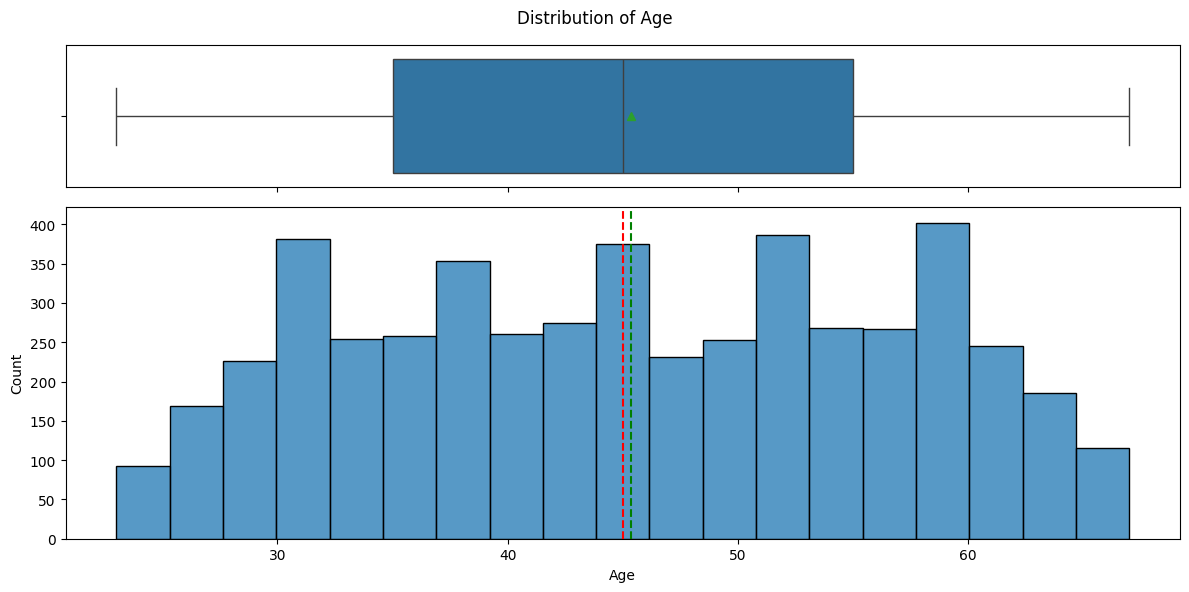

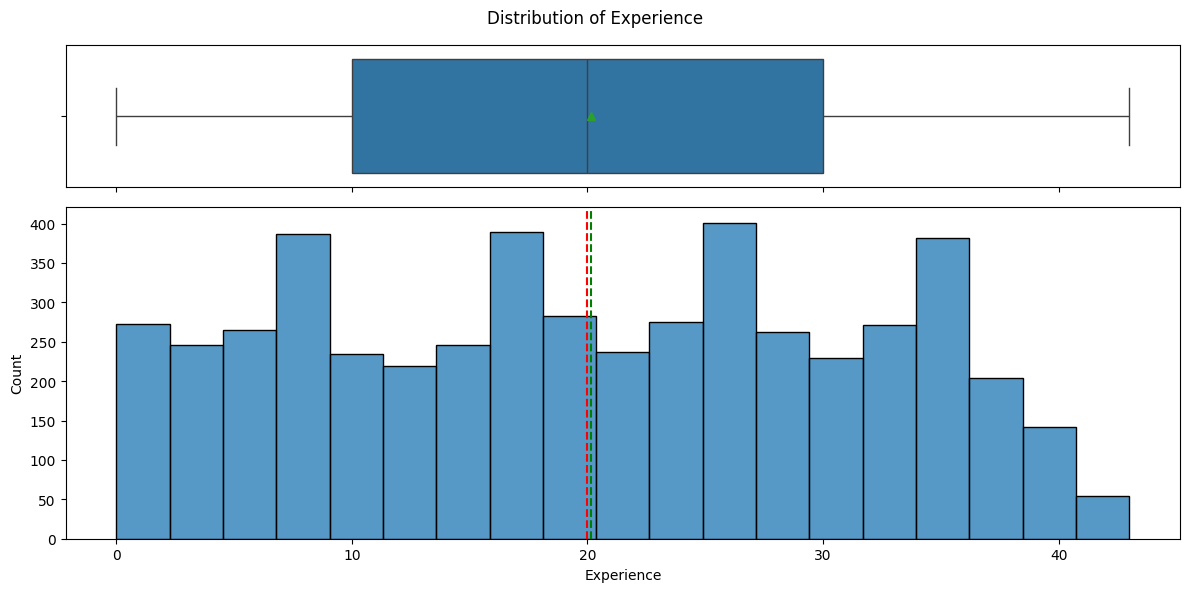

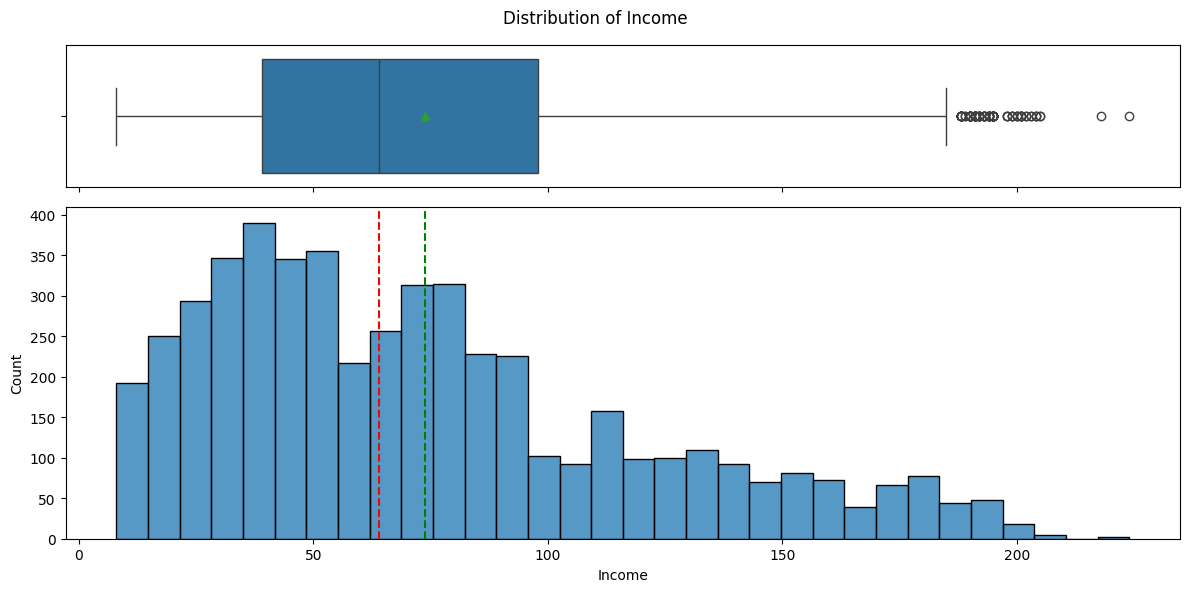

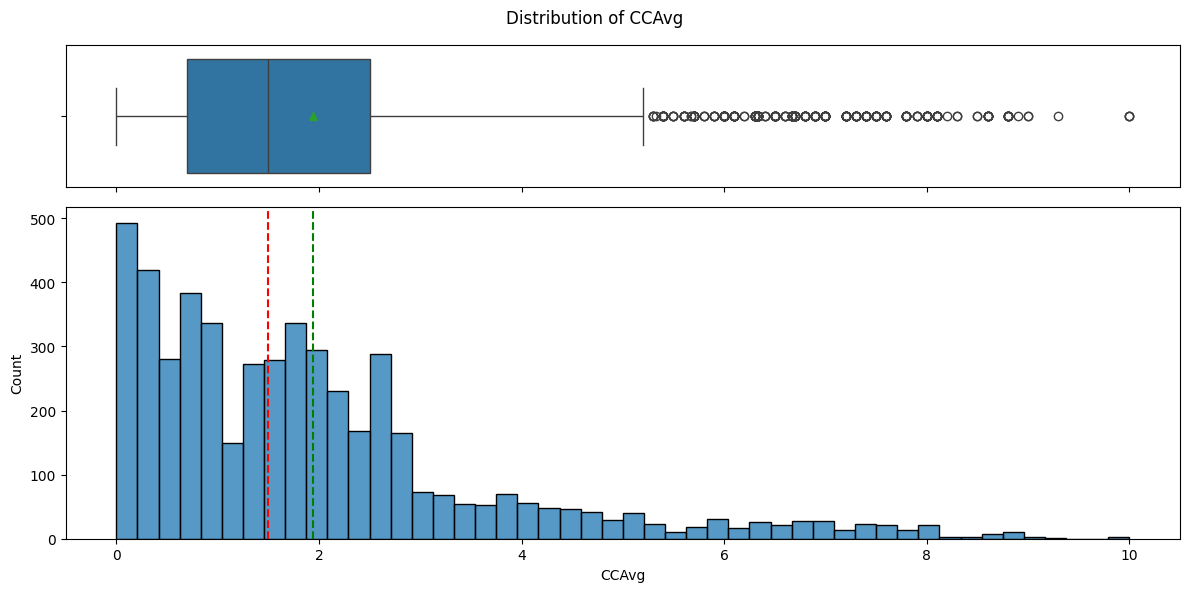

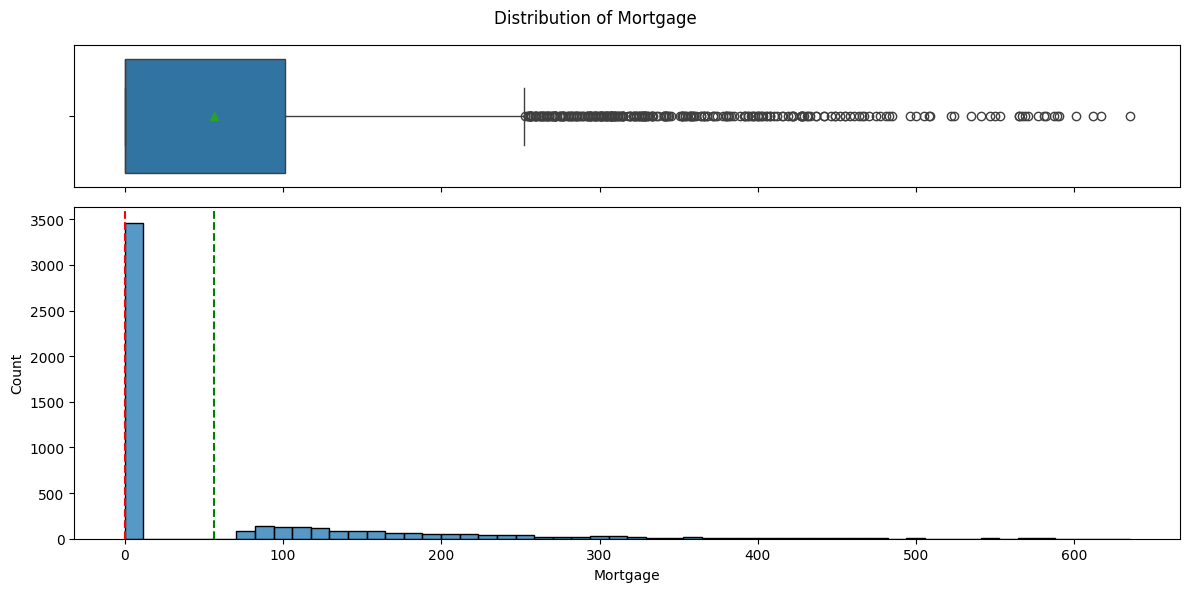

In [54]:
for col in num_cols:
  histplot_and_boxplot(data, col)

**Observations:**
*   There are significant number of customers who don't have any mortgage and some customers have high mortgage debt. Let's analyse the mortgage distribution further.
*   There are customers who don't have any avg. monthly spending on credit card and there are some outliers in the distribution of average monthly credit card spending. We will also analyse this distribution further.



In [55]:
# customers with no mortgage
no_mortgage = data[data['Mortgage'] == 0]['Mortgage'].count()
Percentage_of_Customers_with_No_Mortgage = round((no_mortgage/data.shape[0])*100, 2)
pd.DataFrame([no_mortgage, Percentage_of_Customers_with_No_Mortgage], index = ['No Mortgage', 'Percentage']).T

No Mortgage  Percentage
0       3462.0       69.24

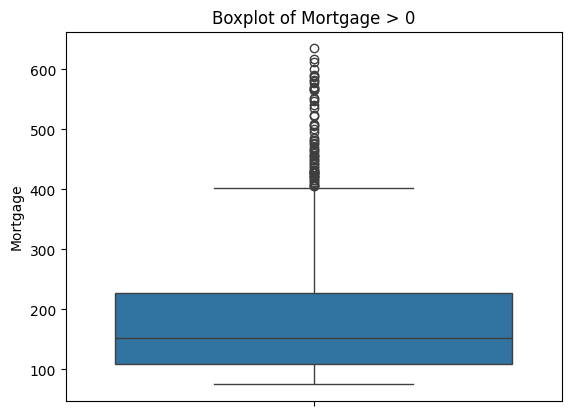

In [56]:
# Customer with mortgage
with_mortgage = data[data['Mortgage'] > 0]['Mortgage']
sns.boxplot(data = with_mortgage)
plt.title('Boxplot of Mortgage > 0')
plt.show()

In [57]:
# Statistics - Customers with mortgage debt
with_mortgage.describe().T

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

In [58]:
# Customers with high mortgage debt
IQR = data['Mortgage'].quantile(0.75) - data['Mortgage'].quantile(0.25)
high_mortgage = data[data['Mortgage'] >= (data['Mortgage'].quantile(0.75) + 1.5*IQR)]['Mortgage'].count()
high_mortgage_percentage = round((high_mortgage/data.shape[0])*100, 2)
print("Upper whisker value:", data['Mortgage'].quantile(0.75) + 1.5*IQR)
pd.DataFrame([high_mortgage, high_mortgage_percentage], index = ['Count of High Mortgage', 'Percentage']).T


Upper whisker value: 252.5


Count of High Mortgage  Percentage
0                   291.0        5.82

In [59]:
# customers percentage with mortgage debt above $100k among the customers who have mortgage
mortgage_debt_100k = data[data['Mortgage'] >= 100]['Mortgage'].count()
mortgage_debt_percentage_100k = round((mortgage_debt_100k/1538)*100, 2)
pd.DataFrame([mortgage_debt_100k, mortgage_debt_percentage_100k], index = ['Mortgage holders with $100k or more', 'Percentage(Among mortgage all holders)']).T

Mortgage holders with $100k or more  Percentage(Among mortgage all holders)
0                               1268.0                                   82.44

In [60]:
# cutomers with no credit card
no_credit_card = data[data['CCAvg'] == 0]['CCAvg'].count()
no_credit_card_percentage = round((no_credit_card/data.shape[0])*100, 2)
pd.DataFrame([no_credit_card, no_credit_card_percentage], index = ['No Credit Card', 'Percentage']).T

No Credit Card  Percentage
0           106.0        2.12

In [61]:
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

**Observations:**

* There are 1470 customers have Credit cards

**Univariate analysis of categorical data**


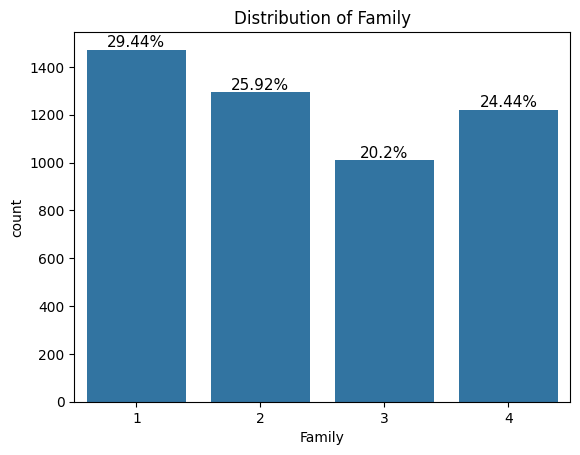

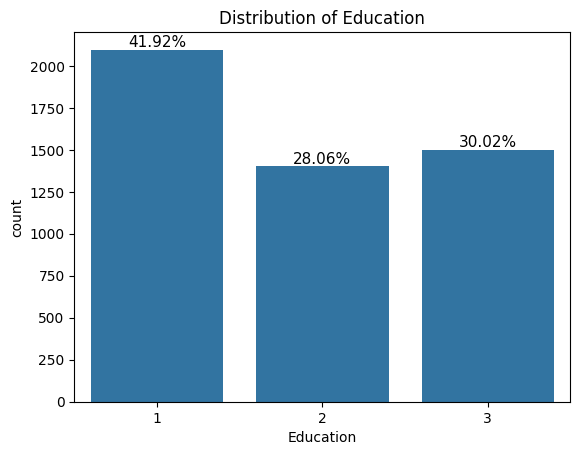

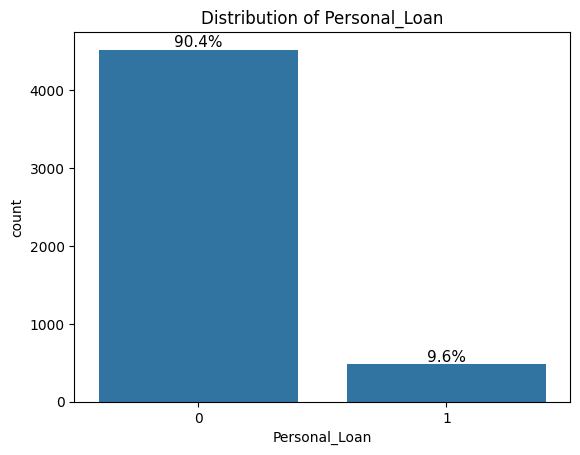

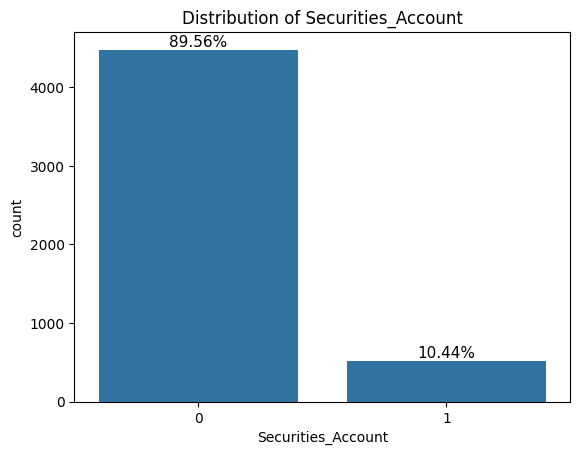

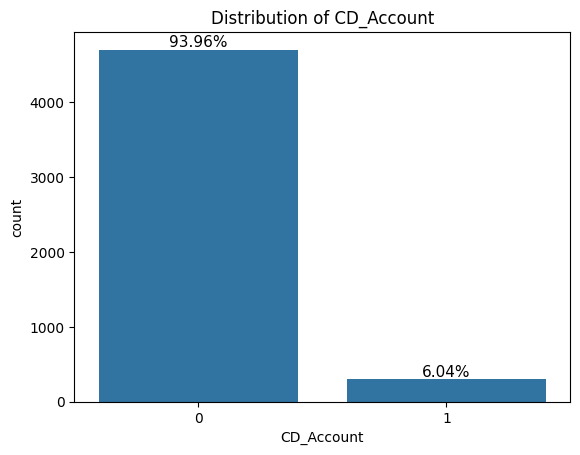

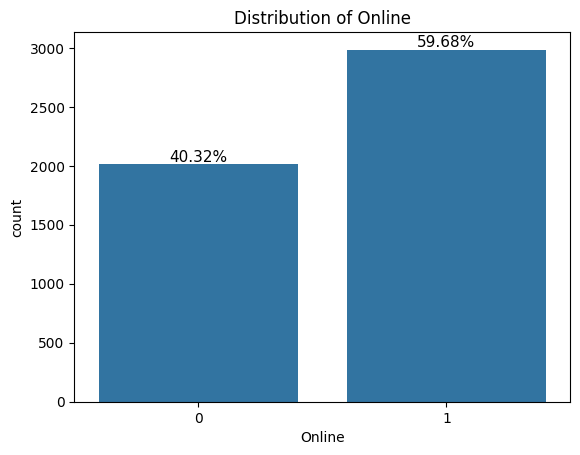

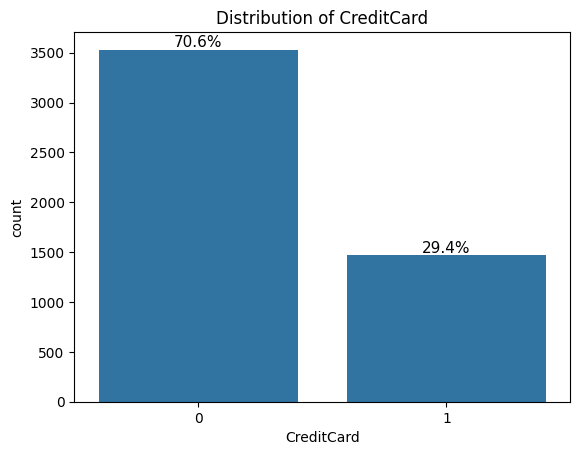

In [62]:
for col in cat_cols:
  if col != 'ZIPCode':
    labelled_countplot(data, col)

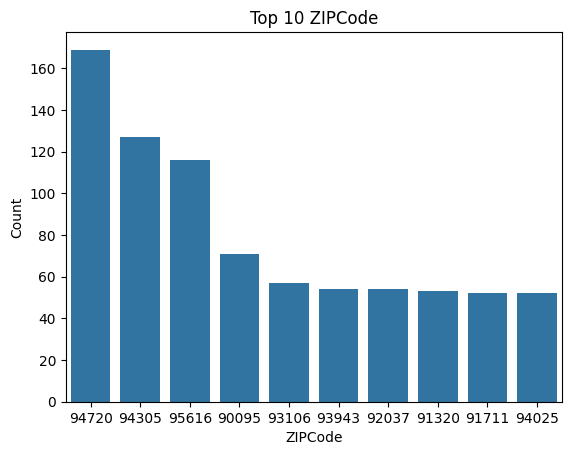

In [64]:
# top 10 zipcode
top10_zipcode = data['ZIPCode'].value_counts().head(10).reset_index()
top10_zipcode.columns = ['ZIPCode', 'Count']
sns.barplot(data= top10_zipcode, x = 'ZIPCode', y = 'Count'
            , order=top10_zipcode.sort_values('Count', ascending=False)['ZIPCode']
)
plt.title('Top 10 ZIPCode')
plt.xlabel('ZIPCode')
plt.ylabel('Count')
plt.show()

**Observation:**
* Both mean and median age of the customers is around 45. 75% of the customer is either 35 years old or older than 35 years.
* 75% of customers have 10 years or more professional experience. The average professional experience of the customers is around 20 years which also happens to be the median professional experience.
* The average income of the customers is higher than the median income due to some customers' very high income(outliers in the data).
* Some customers' credit card average spending per month is over dollars 5k though 75% of the customers' average spending on credit card is less than or equal dollars 2.5k.
* There are 106 customers who either doesn't have any credit card or they just don't use it.
* 69.24% customers have no mortgage. 5.82% customers have mortgage debt of dollars 252.5k or more.
* The family size for 29.4% customers is one, 24.4% customers have family size 4
Education level for 41.9% customers is undergrad, around 30% customers have advanced professional education level
* 9.4% customers in the dataset have personal loan with AllLife bank
* 10.4% customers have securities account with the bank
* Around 6% customers have certificate deposit account
* Around 59% customers do internet banking
* Around 29% customers use credit card issued by other banks
* Top 5 ZIPcode areas in descending order are 94720, 94305, 95616, 90095 and 93106

**Multivariate analysis**


**Multivariate analysis: (Numerical features vs Personal_Loan)**



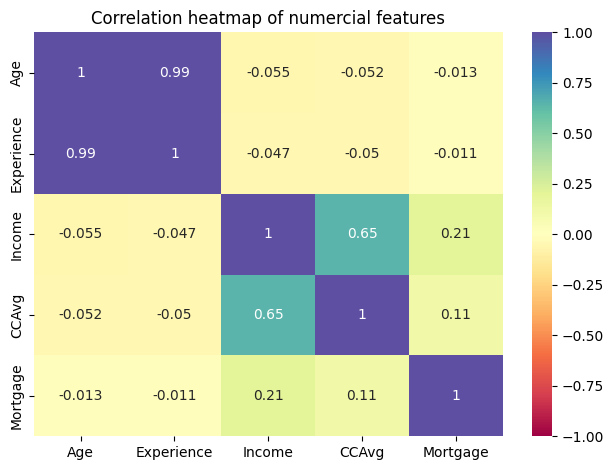

In [65]:
# heatmap
sns.heatmap(data[num_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
plt.title('Correlation heatmap of numercial features')
plt.tight_layout()
plt.show()

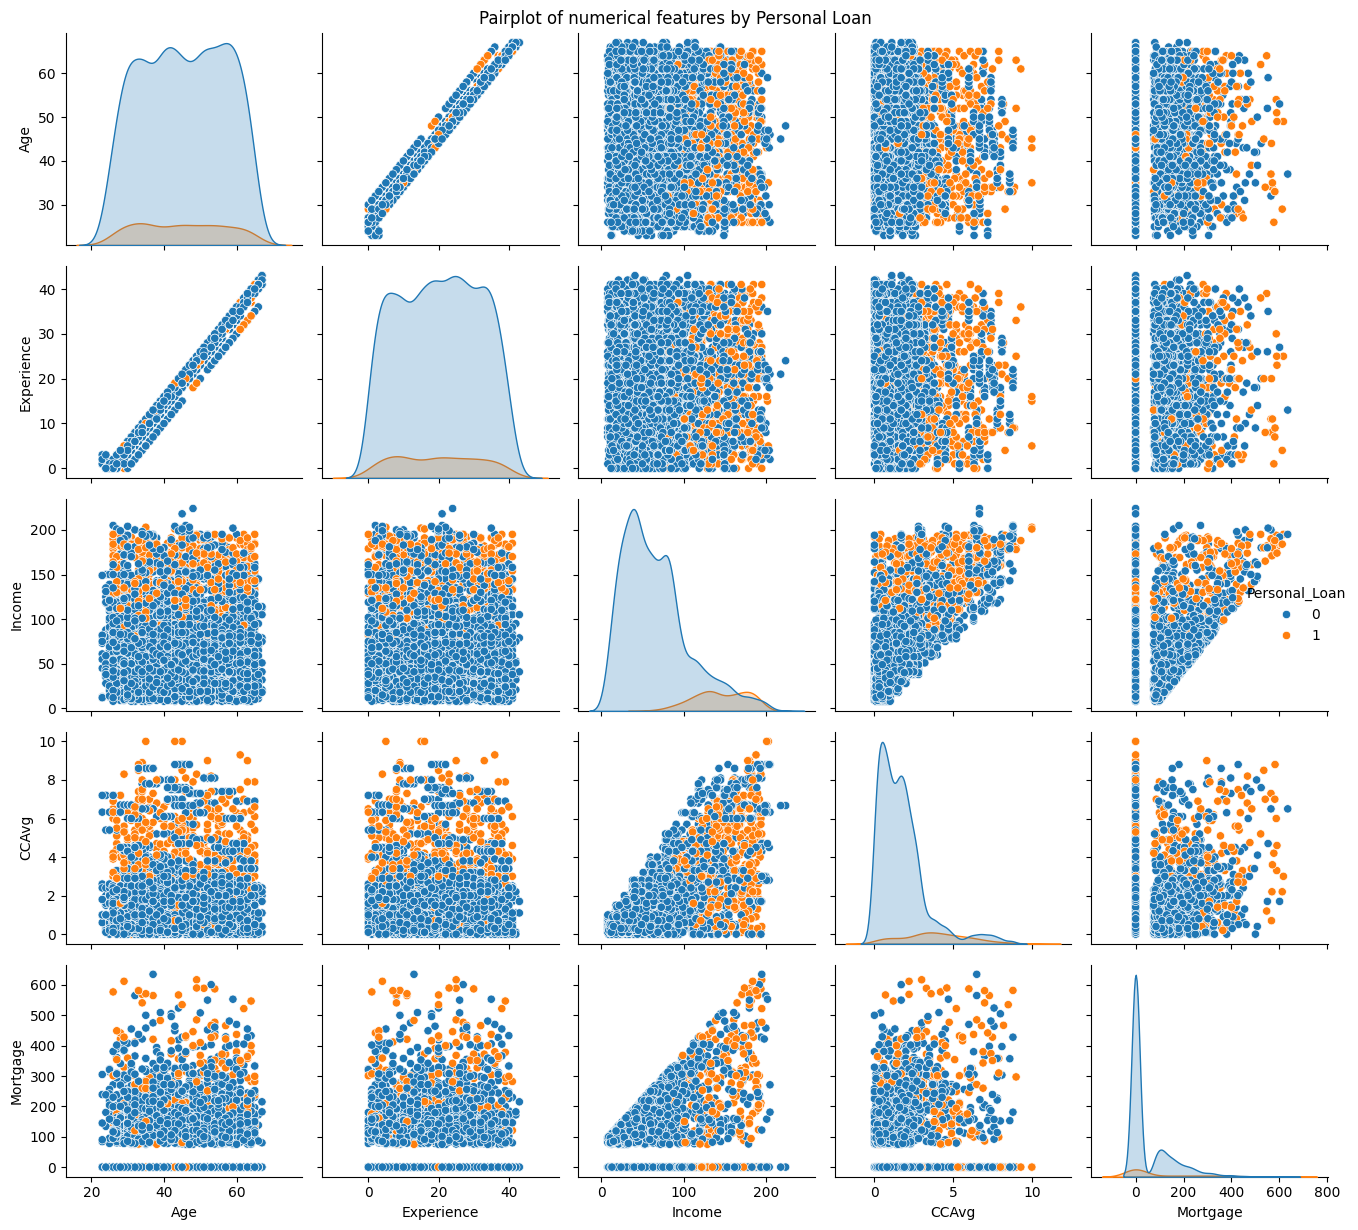

In [66]:
# pairplot
sns.pairplot(data[num_cols + ['Personal_Loan']], hue='Personal_Loan', diag_kind='kde')
plt.suptitle('Pairplot of numerical features by Personal Loan')
plt.tight_layout()
plt.show()

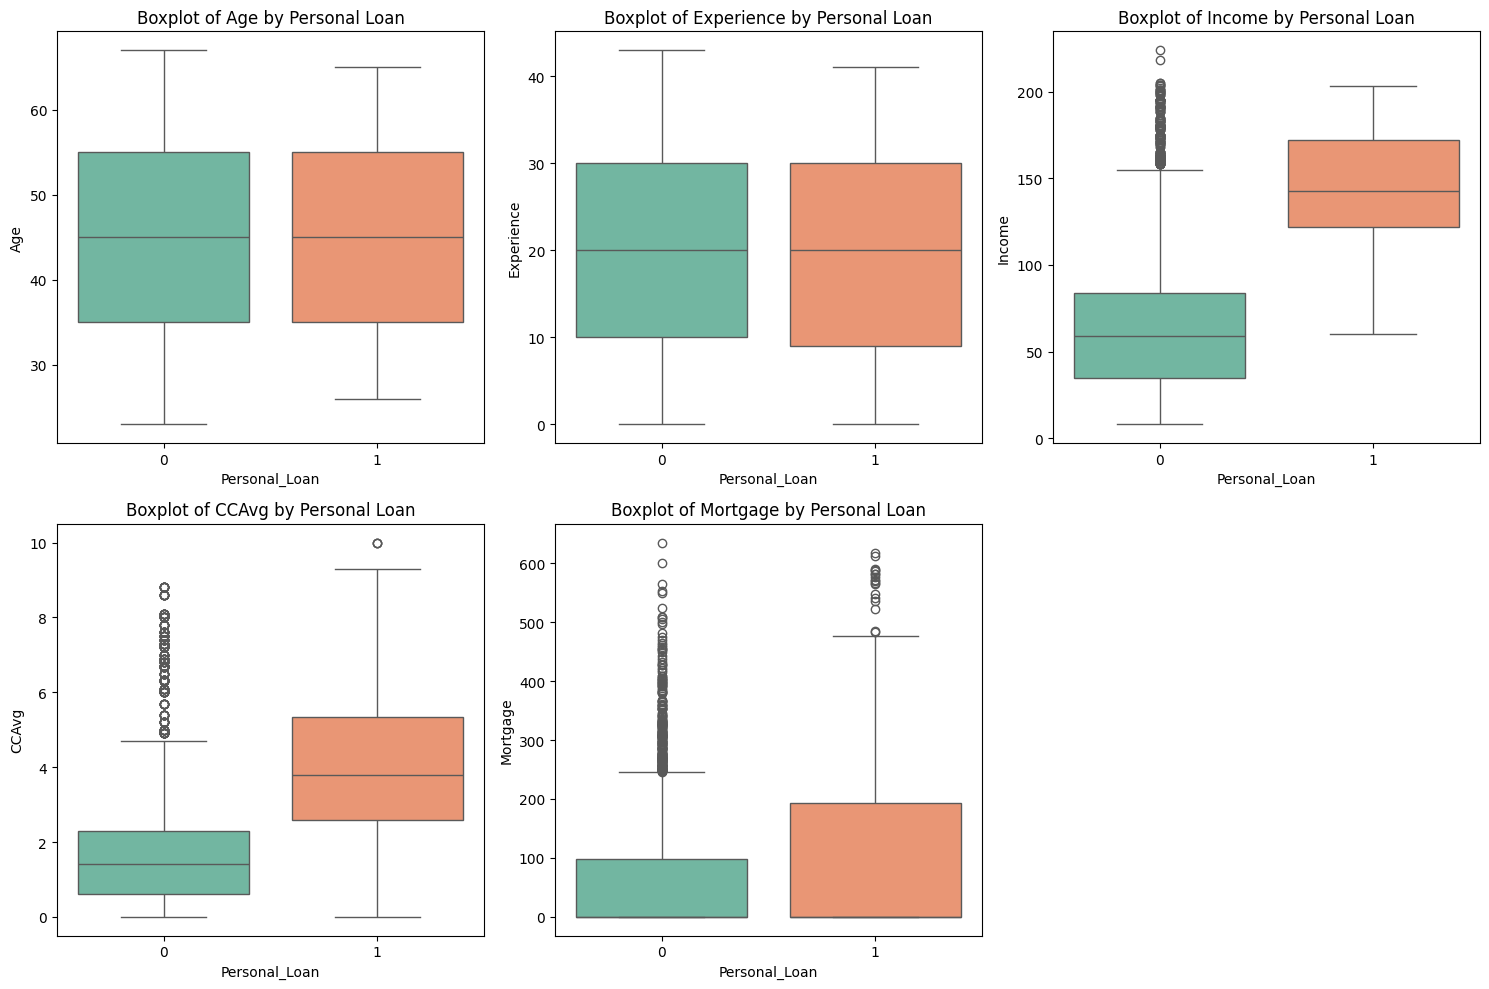

In [67]:
plt.figure(figsize=(15,10))

for i,col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(data = data, x = 'Personal_Loan', y = col, palette='Set2')
  plt.title(f'Boxplot of {col} by Personal Loan')
  plt.tight_layout()

plt.show()

In [68]:
# 25th percentile of income of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['Income'].quantile(0.25)

122.0

In [69]:
# 25th percentile of monthly credit card spending of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['CCAvg'].quantile(0.25)

2.6

In [70]:
# 75th percentile of monthly credit card spending of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['CCAvg'].quantile(0.75)

5.3475

In [71]:
# Customer(who accepted loan offer) count by mortgage status
converted_customer_no_mortgage = data.loc[(data['Mortgage'] == 0) & (data['Personal_Loan'] == 1)]['Mortgage'].count()
converted_customer_with_mortgage = data.loc[(data['Mortgage'] > 0) & (data['Personal_Loan'] == 1)]['Mortgage'].count()
pd.DataFrame([converted_customer_no_mortgage, converted_customer_with_mortgage], index = ['No Mortgage', 'With Mortgage'], columns = ['Count'])


Count
No Mortgage      312
With Mortgage    168

In [72]:
# 25th precentile of mortgage debt of the customers who accepted loan offer
data.loc[(data['Mortgage'] > 0) & (data['Personal_Loan'] == 1)]['Mortgage'].quantile(0.25)

174.0

**Multivariate analysis: (Categorical feature vs Personal_Loan)**



In [73]:
def stacked_barplot(data, predictor, target):
  denorm_tab = pd.crosstab(data[predictor], data[target])
  print(f'\033[1mCrosstab of {predictor} vs {target}\033[0m')
  print(denorm_tab)
  norm_tab = pd.crosstab(data[predictor], data[target], normalize='index')
  norm_tab.plot(kind='bar', stacked=True)
  plt.title(f'Stacked Barplot of {predictor} by {target}')
  plt.xlabel(predictor)
  plt.ylabel('Percentage')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.tight_layout()
  plt.show()

Crosstab of Family vs Personal_Loan
Personal_Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


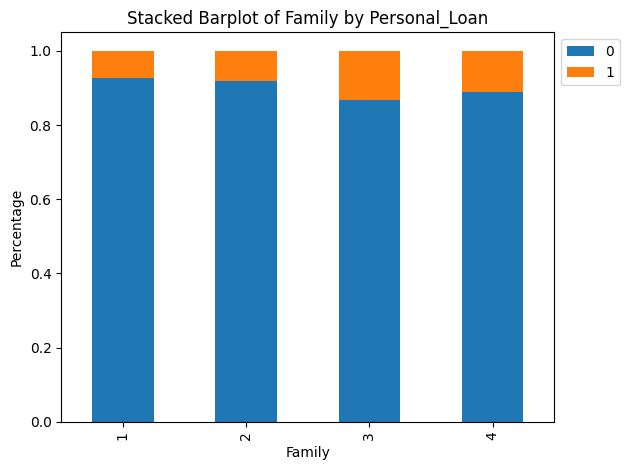


Crosstab of Education vs Personal_Loan
Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


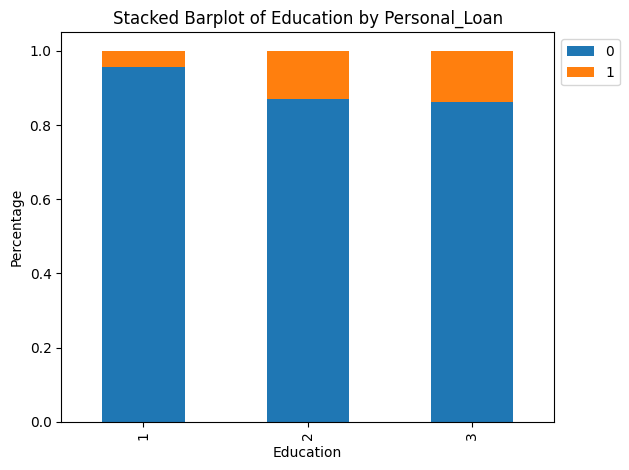


Crosstab of Securities_Account vs Personal_Loan
Personal_Loan          0    1
Securities_Account           
0                   4058  420
1                    462   60


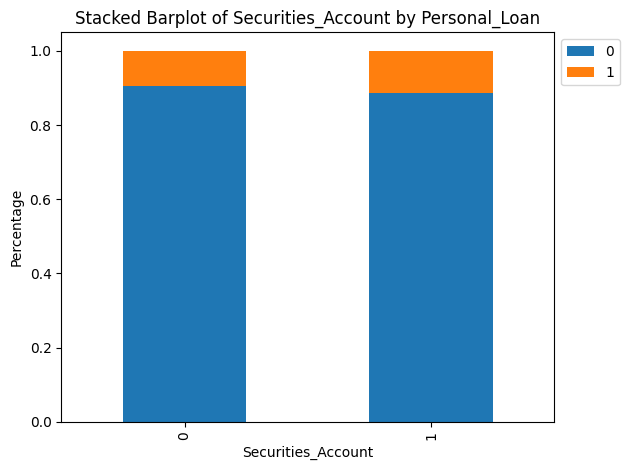


Crosstab of CD_Account vs Personal_Loan
Personal_Loan     0    1
CD_Account              
0              4358  340
1               162  140


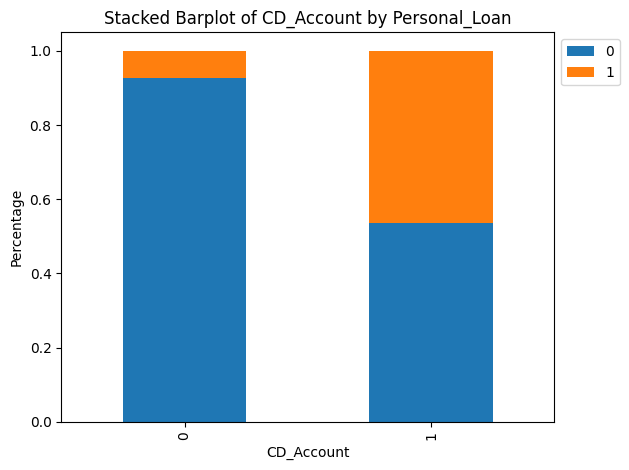


Crosstab of Online vs Personal_Loan
Personal_Loan     0    1
Online                  
0              1827  189
1              2693  291


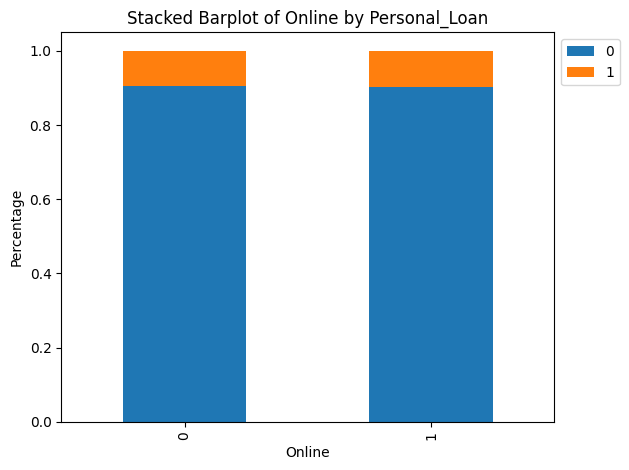


Crosstab of CreditCard vs Personal_Loan
Personal_Loan     0    1
CreditCard              
0              3193  337
1              1327  143


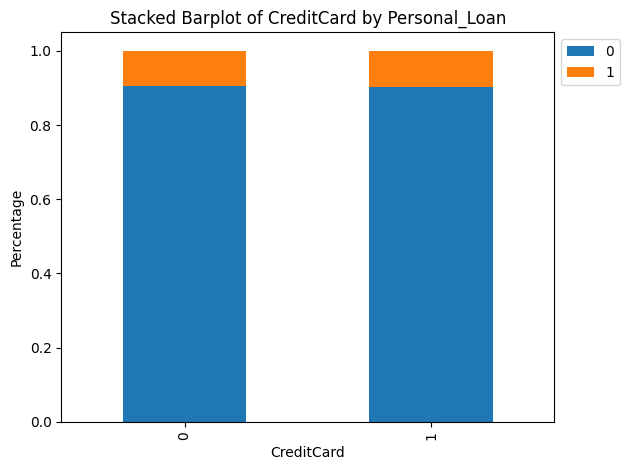

In [74]:
for col in cat_cols:
  if (col != 'ZIPCode') and (col != 'Personal_Loan'):
    stacked_barplot(data, col, 'Personal_Loan')
    print()

**Analysis of ZIPCode**

In [75]:
data['ZIPCode'].nunique()


467

In [76]:
# installing uszipcode python library, we will use it to extract more information about ZIPCode
!pip install uszipcode "sqlalchemy_mate>=1.4.28.3,<2.0.0.0"

In [77]:
from uszipcode import SearchEngine
warnings.filterwarnings("ignore", category=UserWarning, module="uszipcode")
search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)
def get_zipcode_info(zipcode):
  result = None
  try:

    result = search.by_zipcode(zipcode)
  except Exception as e:
    pass
  finally:
     if result:
            return {
                'zipcode': result.zipcode,
                'city': result.major_city,
                'state': result.state,
            }
     else:
            return {
                'zipcode': zipcode,
                'city': None,
                'state': None,
            }

In [78]:
zipcode_info = data['ZIPCode'].apply(get_zipcode_info)
search.close()
zipcode_info_df = pd.DataFrame(zipcode_info.tolist())
zipcode_info_df.head()

zipcode           city state
0   91107       Pasadena    CA
1   90089    Los Angeles    CA
2   94720       Berkeley    CA
3   94112  San Francisco    CA
4   91330     Northridge    CA

In [79]:
zipcode_info_df['state'].nunique()

1

In [80]:
zipcode_info_df.isnull().sum()

zipcode     0
city       34
state      34
dtype: int64

In [81]:
zipcode_info_df['city'].nunique()

244

**Observations:**
* We have 467 unique ZIPCode in the dataset
* After using uszipcode library we can map these ZIPCodes to corresponding cities. There are 34 ZIPCode in the dataset for which we are not able identify a corresponding city. We can map those ZIPCode to value 'Other'

In [82]:
# mapping null city to others
zipcode_info_df['city'].fillna('Other', inplace=True)
zipcode_info_df['city'].isnull().sum()

0

In [83]:
data['City'] = zipcode_info_df['city']

In [84]:
data['City'].nunique()

245

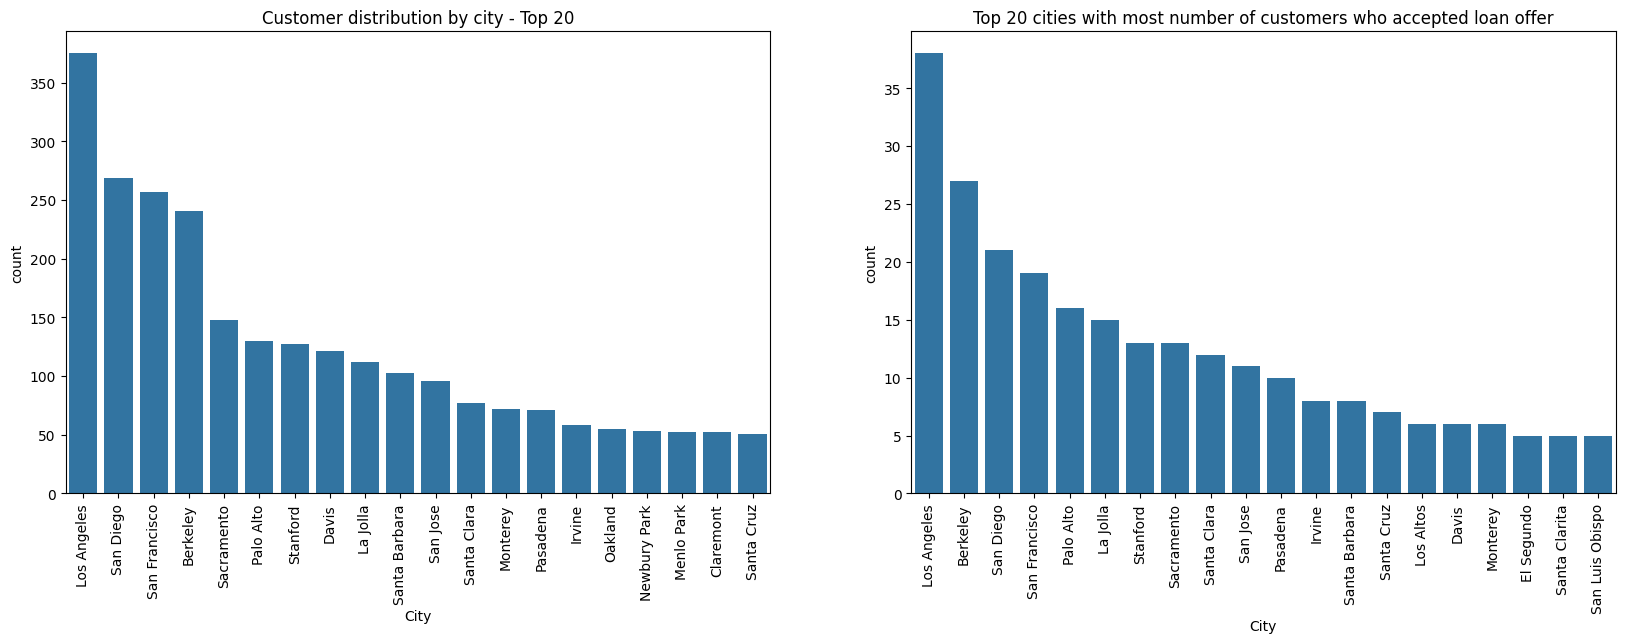

In [85]:
loan_offer_by_city = data.groupby('City')['Personal_Loan'].value_counts().reset_index()
customer_by_city = data['City'].value_counts().reset_index().head(20)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data = customer_by_city, x = 'City', y= 'count')
plt.xticks(rotation=90)
plt.title('Customer distribution by city - Top 20')
plt.subplot(1,2,2)
data_to_plot = loan_offer_by_city[loan_offer_by_city['Personal_Loan'] == 1].sort_values('count', ascending=False).head(20)
sns.barplot(data=data_to_plot, x='City', y='count')
plt.xticks(rotation=90)
plt.title('Top 20 cities with most number of customers who accepted loan offer')
plt.show()

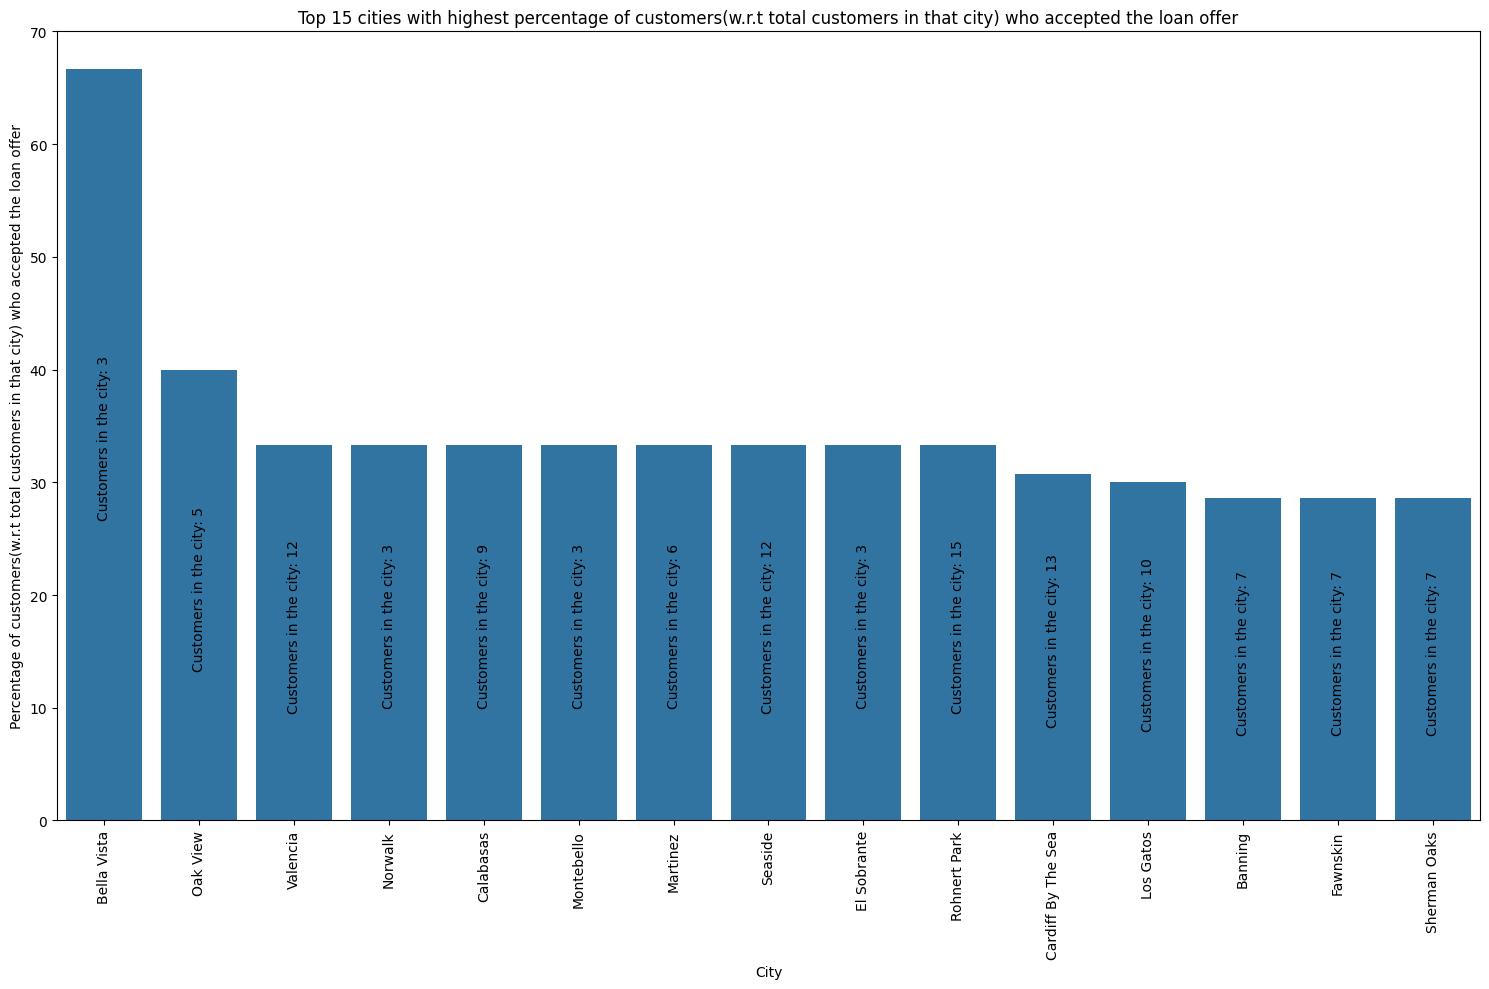

In [86]:
def percentage_by_city_customer(data):
  Total_customer_in_the_city = loan_offer_by_city.loc[loan_offer_by_city['City'] == data['City']]['count'].sum()
  percentage = (data['count']/Total_customer_in_the_city)*100
  return percentage, Total_customer_in_the_city
loan_offer_by_city[['Percentage', 'Total_customer_in_the_city']] = loan_offer_by_city.apply(
    lambda row: percentage_by_city_customer(row), axis=1, result_type='expand'
)
TopCity_by_acceptance_percentage = loan_offer_by_city[loan_offer_by_city['Personal_Loan'] == 1].sort_values('Percentage', ascending=False).head(15)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=TopCity_by_acceptance_percentage, x='City', y='Percentage')
ax.bar_label(ax.containers[0], labels=[f'Customers in the city: {int(val)}' for val in TopCity_by_acceptance_percentage['Total_customer_in_the_city']], padding=5, label_type='center', rotation=90)
plt.xticks(rotation=90)
plt.title('Top 15 cities with highest percentage of customers(w.r.t total customers in that city) who accepted the loan offer')
plt.ylabel('Percentage of customers(w.r.t total customers in that city) who accepted the loan offer')
plt.tight_layout()
plt.show()

**Chi-square test - Catgorical feature vs Personal_Loan**



In [87]:
def chi_square_test(data, predictor, target):
  crosstab = pd.crosstab(data[predictor], data[target])
  Ho = f"{predictor} has no effect on {target}"  # Stating the Null Hypothesis
  Ha = f"{predictor} has an effect on {target}"  # Stating the Alternate Hypothesis

  chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

  if p_value < 0.05:  # Setting our significance level at 5%
      print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
  else:
      print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

In [88]:
refined_index = (np.array(cat_cols) != 'Personal_Loan') & (np.array(cat_cols) != 'ZIPCode')
refined_cat_cols = np.array(cat_cols)[refined_index]
refined_cat_cols = np.append(refined_cat_cols, 'City')
for col in refined_cat_cols:
  chi_square_test(data, col, 'Personal_Loan')
  print()

Family has an effect on Personal_Loan as the p_value (0.0) < 0.05

Education has an effect on Personal_Loan as the p_value (0.0) < 0.05

Securities_Account has no effect on Personal_Loan as the p_value (0.141) > 0.05

CD_Account has an effect on Personal_Loan as the p_value (0.0) < 0.05

Online has no effect on Personal_Loan as the p_value (0.693) > 0.05

CreditCard has no effect on Personal_Loan as the p_value (0.884) > 0.05

City has no effect on Personal_Loan as the p_value (0.869) > 0.05



**Observations:**

* There is a strong positive correlation between experience and age. There is also a positive correlation between income and average monthly credit card spending.
* From the pair plot and the box plot of numerical features against Personal_Loan we observe the following:
* Customers who accepted loan offer, 75% of them have annual income 122k USD or more
8 Customers who accepted loan offer, 75% of them have credit card spending around dollars 2.6k or more
* Customers who accepted loan offer, 312 of them have no mortgage compared to only 168 of them have mortage.Customers with mortgage who accepted loan offer 75% of them have mortgage debt of 174k USD or more
* Customers who have certificate of deposit (CD) account with the bank, 46% of them have accepted the loan offer.
* Customers with family size 3 and 4 have accepted the offer more than the customers of family size 1 and 2.
* Customers with graduate level or advanced/professional level education accepted the loan offer more compared to customers with undergraduate level.
Los Angeles, Barkeley and Sandiago are top 3 cities repectively in terms of customers accepting loan offers.
* Bella Vista and Oak View are top two cities in-terms of percentage of customers who accepted loan offer, w.r.t total number of customers in those respective city. However, total size of customers are very small in those cities inflating the percentage
* Using Chi Squared test we observed that Family, Education, CD_Account features have correlation with the target variable Personal_Loan
* Chi Squared test suggests Securities_Account, Online, CreditCard and City feature has no effect on target variable Personal_Loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Outlier treatment:**

* We will start our model building with a decision tree. Decision tree algorithms are usually robust against outliers as it splits the data set by a line but doesn't differentiate how far an item is from that line.

**Feature Engineering:**

* We are going to drop ZIPCode feature as we have mapped this feature to City
* There are 245 cities in the dataset and using chi-squared test we noticed that it doesn't influence our target variable Personal_Loan. we will map the values of City to "Other" where we have less than 20 customers. This will reduce the dimension.
* Around 69% customer has 0 Mortgage.This will reduce the variability in the data. Decision tree performs well with the variability of the classes. We will split the mortgage feature into following categorical features to introduce more variablity of the data.







**No_mortgage:** This includes customers with 0 or no mortgage.

**Mortgage < 109:** This includes customers with 25th percentile of mortgage among customers with mortgage.

**Mortgage 109-153:** This includes customers between 25th percentile and 50th percentile of the mortgage debt among customers with mortgage.

**Mortgage 153-227:** This includes customers with mortgage debt between 50th pecentile and 75th percentile.

**Mortgage > 227:** Customers with mortgage debt of 75th percentile or more among customers with mortgage.

**Dropping ZIPCode and mapping City**



In [89]:
data.drop(columns='ZIPCode', inplace=True) # dropping zipcode
data.head(10)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   
5   37          13      29       4    0.4          2       155              0   
6   53          27      72       2    1.5          2         0              0   
7   50          24      22       1    0.3          3         0              0   
8   35          10      81       3    0.6          2       104              0   
9   34           9     180       1    8.9          3         0              1   

   Securities_Account  CD_Account  Online  CreditCard           City  
0                   1           0       0           0       Pasadena  
1                   1           0       0           0    Los Angeles  
2                   0           0       0           0       Berkeley  
3                   0           0       0           0  San Francisco  
4                   0           0       0           1     Northridge  
5                   0           0       1           0      San Diego  
6                   0           0       1           0      Claremont  
7                   0           0       0           1       Monterey  
8                   0           0       1           0    Los Angeles  
9                   0           0       0           0           Ojai

In [90]:
customer_by_city = data['City'].value_counts().reset_index()
Cities = customer_by_city[customer_by_city['count'] >= 20]['City']
Cities.reset_index(drop=True, inplace=True)
data['City'] = data['City'].apply(lambda x: x if x in Cities.values else 'Other')

In [91]:
data['City'].value_counts()

City
Other                  1533
Los Angeles             375
San Diego               269
San Francisco           257
Berkeley                241
Sacramento              148
Palo Alto               130
Stanford                127
Davis                   121
La Jolla                112
Santa Barbara           103
San Jose                 96
Santa Clara              77
Monterey                 72
Pasadena                 71
Irvine                   58
Oakland                  55
Newbury Park             53
Claremont                52
Menlo Park               52
Santa Cruz               51
El Segundo               50
Riverside                46
Northridge               46
Hayward                  41
Redwood City             37
Los Altos                36
Santa Monica             35
Huntington Beach         35
Livermore                34
Emeryville               34
San Luis Obispo          33
Fallbrook                32
Goleta                   31
Fremont                  31
Cupertino                29
Torrance                 28
Carlsbad                 28
Arcata                   26
Alameda                  26
Moss Landing             26
Walnut Creek             25
South San Francisco      23
Ridgecrest               23
Roseville                23
Mountain View            22
Vallejo                  22
Santa Clarita            22
San Marcos               21
Fullerton                21
Pomona                   21
Mission Viejo            20
Redlands                 20
Name: count, dtype: int64

**Derive Mortgage_Status from Mortgage and then dropping Mortgage**

In [92]:
def get_mortgage_status(x):
  if x == 0:
    return 'No_mortgage'
  elif x > 0 and x <=109 :
    return 'Mortgage < 109'
  elif x > 109 and x <= 153:
    return 'Mortgage 109-153'
  elif x > 153 and x <= 227:
    return 'Mortgage 153-227'
  else:
    return 'Mortgage > 227'
data['Mortgage_Status'] = data['Mortgage'].apply(lambda x: get_mortgage_status(x))
data.drop(columns='Mortgage', inplace=True)
data.head()

Age  Experience  Income  Family  CCAvg  Education  Personal_Loan  \
0   25           1      49       4    1.6          1              0   
1   45          19      34       3    1.5          1              0   
2   39          15      11       1    1.0          1              0   
3   35           9     100       1    2.7          2              0   
4   35           8      45       4    1.0          2              0   

   Securities_Account  CD_Account  Online  CreditCard           City  \
0                   1           0       0           0       Pasadena   
1                   1           0       0           0    Los Angeles   
2                   0           0       0           0       Berkeley   
3                   0           0       0           0  San Francisco   
4                   0           0       0           1     Northridge   

  Mortgage_Status  
0     No_mortgage  
1     No_mortgage  
2     No_mortgage  
3     No_mortgage  
4     No_mortgage

In [93]:
data['Mortgage_Status'].value_counts()


Mortgage_Status
No_mortgage         3462
Mortgage < 109       391
Mortgage 109-153     386
Mortgage > 227       383
Mortgage 153-227     378
Name: count, dtype: int64

* We will do a chi squared test to understand the influence of the newly derived feature Mortgage_Status on our target variable Personal_loan

In [94]:
chi_square_test(data, 'Mortgage_Status', 'Personal_Loan')


Mortgage_Status has an effect on Personal_Loan as the p_value (0.0) < 0.05


**Mortgage_Status has an effect on Personal_Loan**

In [ ]:
data = pd.get_dummies(data, columns=['City', 'Mortgage_Status'], drop_first=True, dtype=int)

In [97]:
data.head()

Age  Experience  Income  Family  CCAvg  Education  Personal_Loan  \
0   25           1      49       4    1.6          1              0   
1   45          19      34       3    1.5          1              0   
2   39          15      11       1    1.0          1              0   
3   35           9     100       1    2.7          2              0   
4   35           8      45       4    1.0          2              0   

   Securities_Account  CD_Account  Online  ...  City_Santa Monica  \
0                   1           0       0  ...                  0   
1                   1           0       0  ...                  0   
2                   0           0       0  ...                  0   
3                   0           0       0  ...                  0   
4                   0           0       0  ...                  0   

   City_South San Francisco  City_Stanford  City_Torrance  City_Vallejo  \
0                         0              0              0             0   
1                         0              0              0             0   
2                         0              0              0             0   
3                         0              0              0             0   
4                         0              0              0             0   

   City_Walnut Creek  Mortgage_Status_Mortgage 153-227  \
0                  0                                 0   
1                  0                                 0   
2                  0                                 0   
3                  0                                 0   
4                  0                                 0   

   Mortgage_Status_Mortgage < 109  Mortgage_Status_Mortgage > 227  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Mortgage_Status_No_mortgage  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  

[5 rows x 67 columns]

In [102]:
data.shape

(5000, 67)

**Data Preparation for Model building**


In [103]:
# define explanatory features and target feature
X = data.drop(columns='Personal_Loan')
y = data['Personal_Loan']
X.shape, y.shape

((5000, 66), (5000,))

In [104]:
RS = 1 # random state

In [105]:
# splitting the data in an 70:30 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RS, stratify=y)


In [106]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 66)
Shape of test set: (1500, 66) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## Model Building






**Model Evaluation Criterion**

* We can use following metrics to evaluate our models
* **Accuracy:** Generalizes the proportion of the correct prediction
* **Recall:** The higher the recall value, the lower the false negative prediction
* **Precision:** The higher the precision value, the lower the false positive prediction
* **F1 Score:** The higher the F1 score, the lower the false positive and false negative in the prediction


* All Life bank wants to maximise the conversion for their loan campaign. So, the higher the false negative prediction, the higher the probabilty that the bank will loose potential loan customers.
* Though predicting false positive will increase the conversion cost of the campaign, false negative prediction will likely cost more in this case.
* So our goal is to maximise recall to reduce false negative predictions


In [109]:
def model_performance(estimator, X, y):
  y_pred = estimator.predict(X)
  accuracy = accuracy_score(y, y_pred)
  recall = recall_score(y, y_pred)
  precision = precision_score(y, y_pred)
  f1 = f1_score(y, y_pred)
  df = pd.DataFrame([accuracy, recall, precision, f1], index=['Accuracy', 'Recall', 'Precision', 'F1 Score'], columns=['Score'])
  return df.T

def confusion_matrix_plot(estimator, X, y, title = 'Confusion Matrix'):
  y_pred = estimator.predict(X)
  cm = confusion_matrix(y, y_pred)
  labels = np.asarray(
        [
           ["{0:0.0f}".format(item) + "\n {0:.2%}".format((item)/cm.flatten().sum())]
           for item in cm.flatten()
        ]
    ).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="")
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

### Model Building

In [110]:
def visualize_tree(estimator, features, figsize=(25,20)):
    plt.figure(figsize=figsize)
    out = tree.plot_tree(
        decision_tree = estimator,
        feature_names = features,
        filled = True,
        fontsize = 9,
        node_ids= True)
    plt.show()

def print_tree(estimator, features):
    tree_rules = tree.export_text(estimator, feature_names=features, show_weights = True)
    print(tree_rules)

In [111]:
def plot_feature_importance(estimator, features, figsize = (15,20)):
  feature_importances = estimator.feature_importances_
  indices = np.argsort(feature_importances)
  plt.figure(figsize= figsize)
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), feature_importances[indices], color='violet', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()
def feature_importance_table(estimator, features):
  feature_importances = estimator.feature_importances_

  # Create a DataFrame directly without sorting first
  feature_importance_df = pd.DataFrame({
      'Feature': features,
      'Importance': feature_importances
  })

  # Sort the DataFrame by importance in descending order and print all rows
  with pd.option_context('display.max_rows', None):
      print(feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True))


**Default model**


In [112]:
# decision tree model with all features
model_default = DecisionTreeClassifier(random_state=RS)
model_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [113]:
# Performance on train set
model_default_train_perf = model_performance(model_default, X_train, y_train)
model_default_train_perf.index.values[0] = 'Default model train score'
model_default_train_perf

Accuracy  Recall  Precision  F1 Score
Default model train score       1.0     1.0        1.0       1.0

In [114]:
model_default_test_perf = model_performance(model_default, X_test, y_test)
model_default_test_perf.index.values[0] = 'Default model test score'
model_default_test_perf

Accuracy    Recall  Precision  F1 Score
Default model test score  0.979333  0.895833   0.889655  0.892734

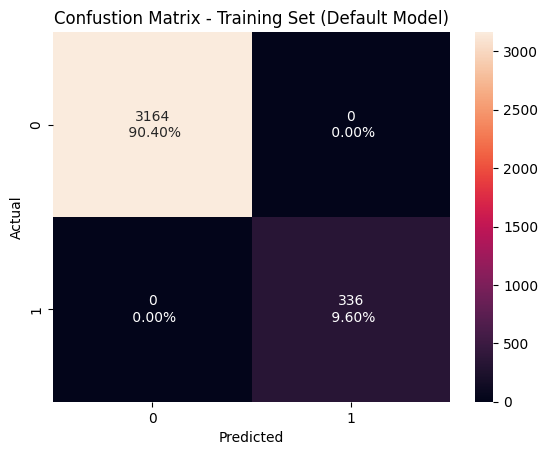

In [115]:
confusion_matrix_plot(model_default, X_train, y_train, title = 'Confustion Matrix - Training Set (Default Model)')

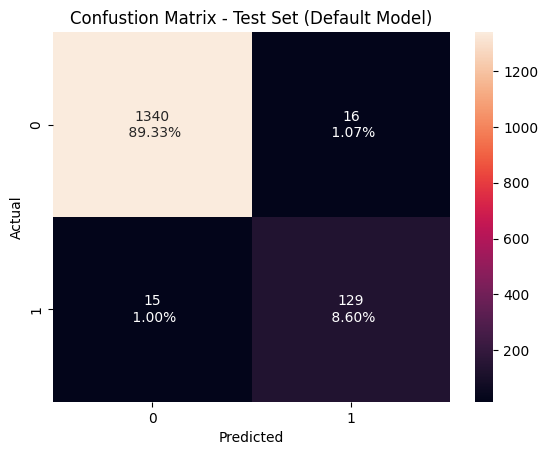

In [116]:
confusion_matrix_plot(model_default, X_test, y_test,  title = 'Confustion Matrix - Test Set (Default Model)')

In [117]:
# Training Set vs Test Set
train_vs_test_default = pd.concat([model_default_train_perf, model_default_test_perf], axis=0)
train_vs_test_default

Accuracy    Recall  Precision  F1 Score
Default model train score  1.000000  1.000000   1.000000  1.000000
Default model test score   0.979333  0.895833   0.889655  0.892734

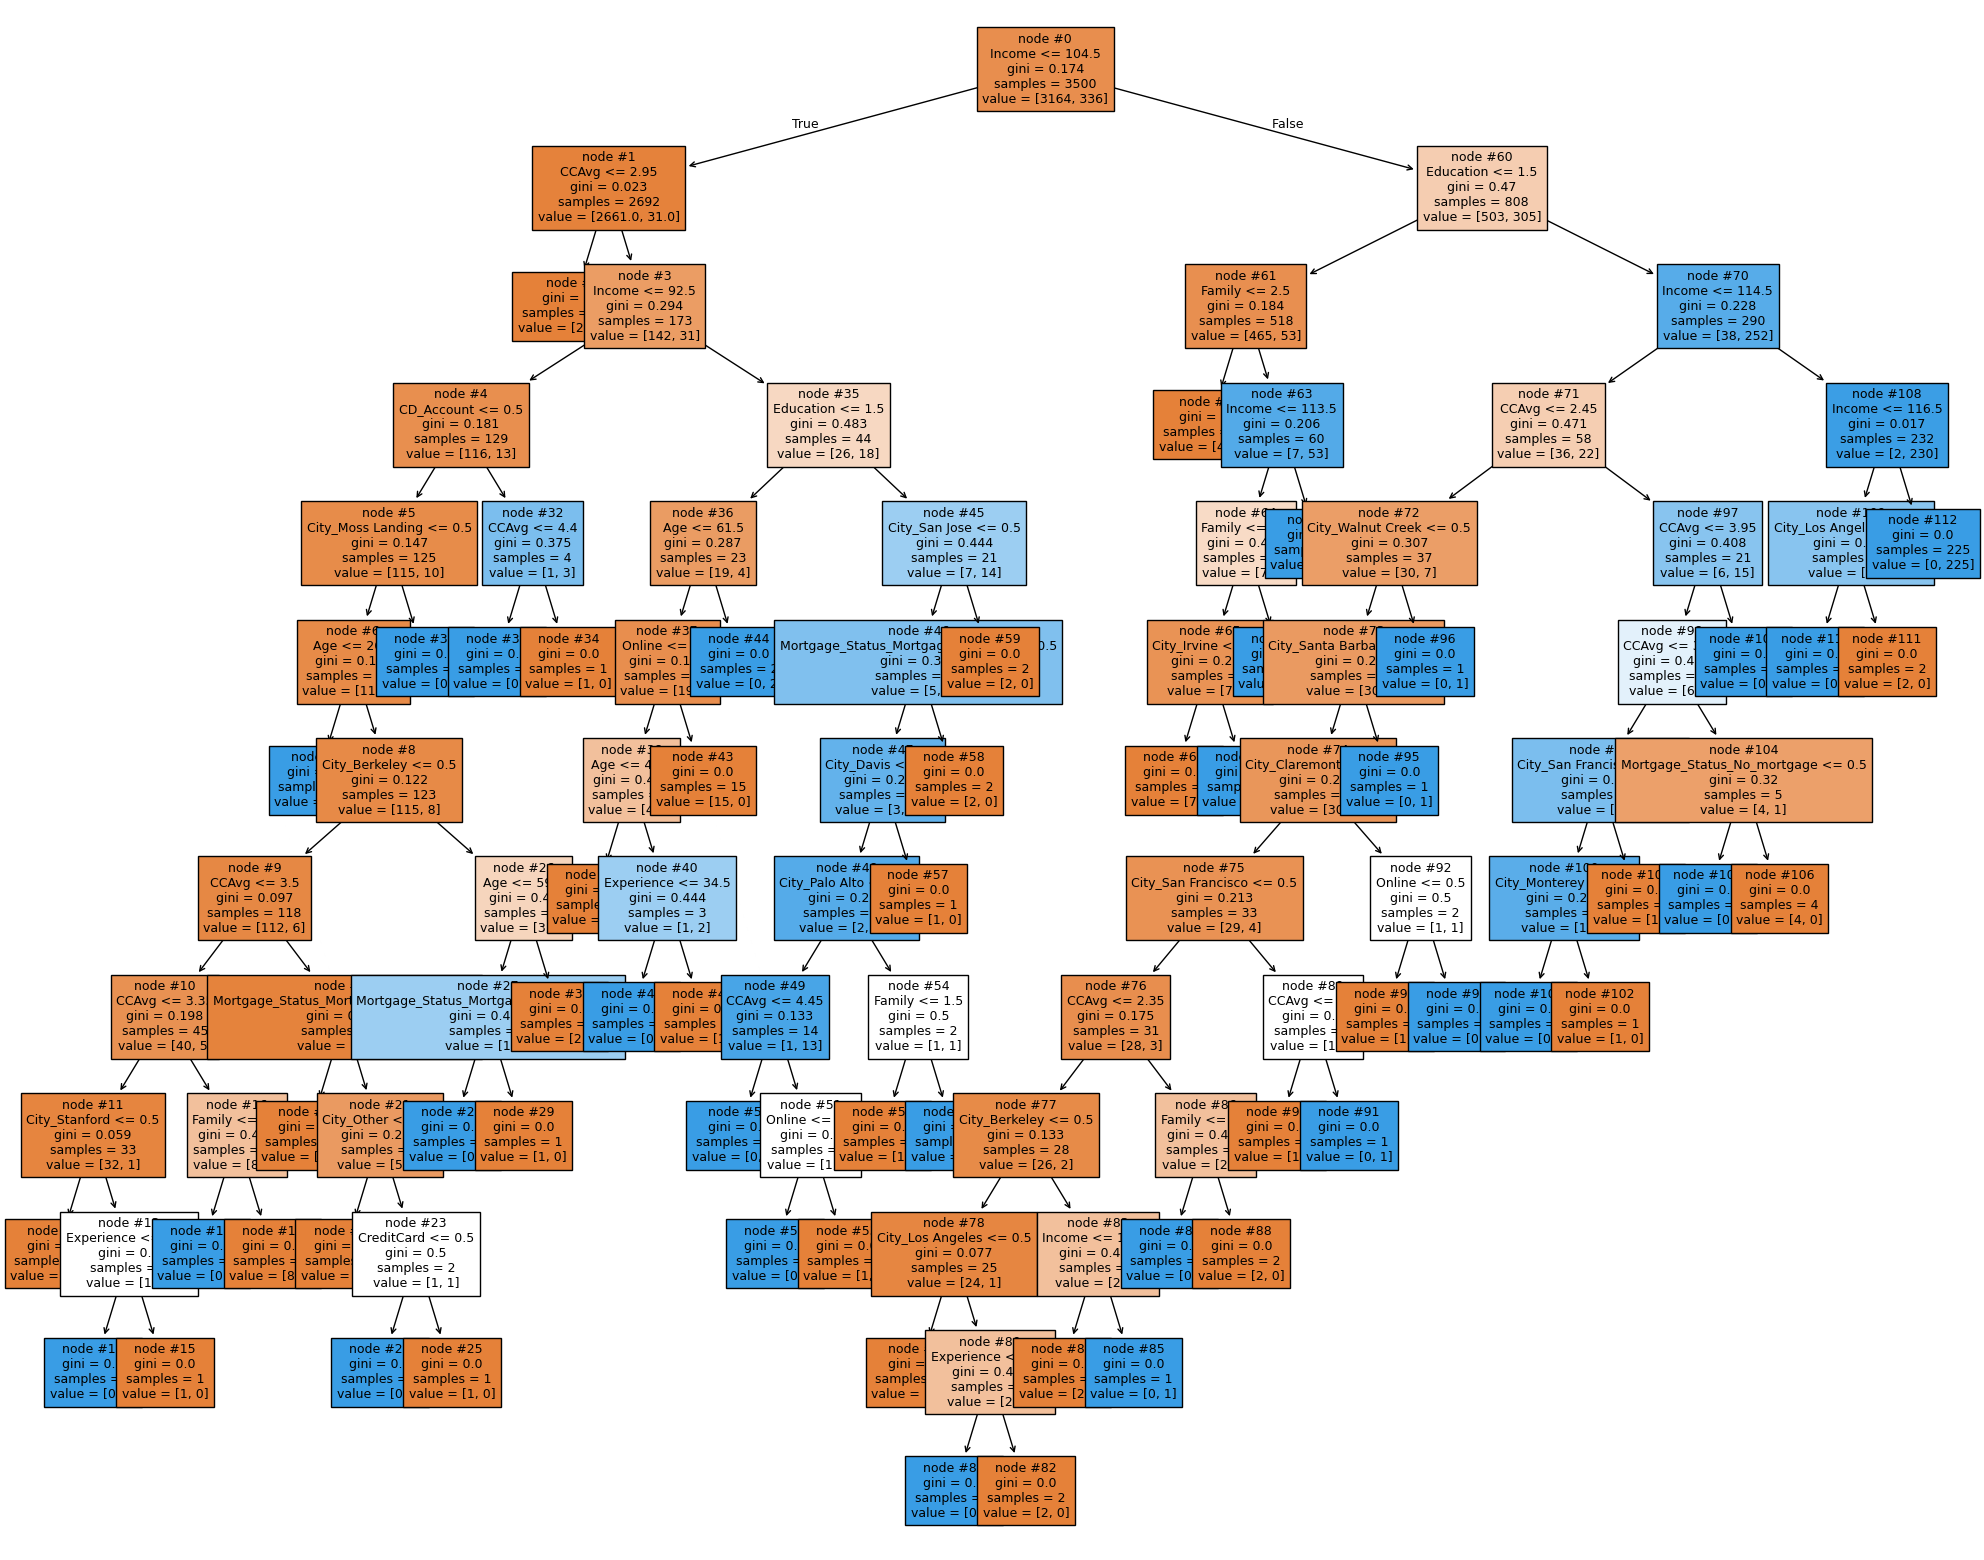

In [118]:
visualize_tree(model_default, X_train.columns)

In [119]:
print_tree(model_default, X_train.columns)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- City_Moss Landing <= 0.50
|   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |--- City_Berkeley <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |   |   |--- City_Stanford <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [31.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- City_Stanford >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- Experience >  13.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] clas

In [120]:
model_default.get_depth(), model_default.get_n_leaves() # tree depth and no of leaves

(12, 57)

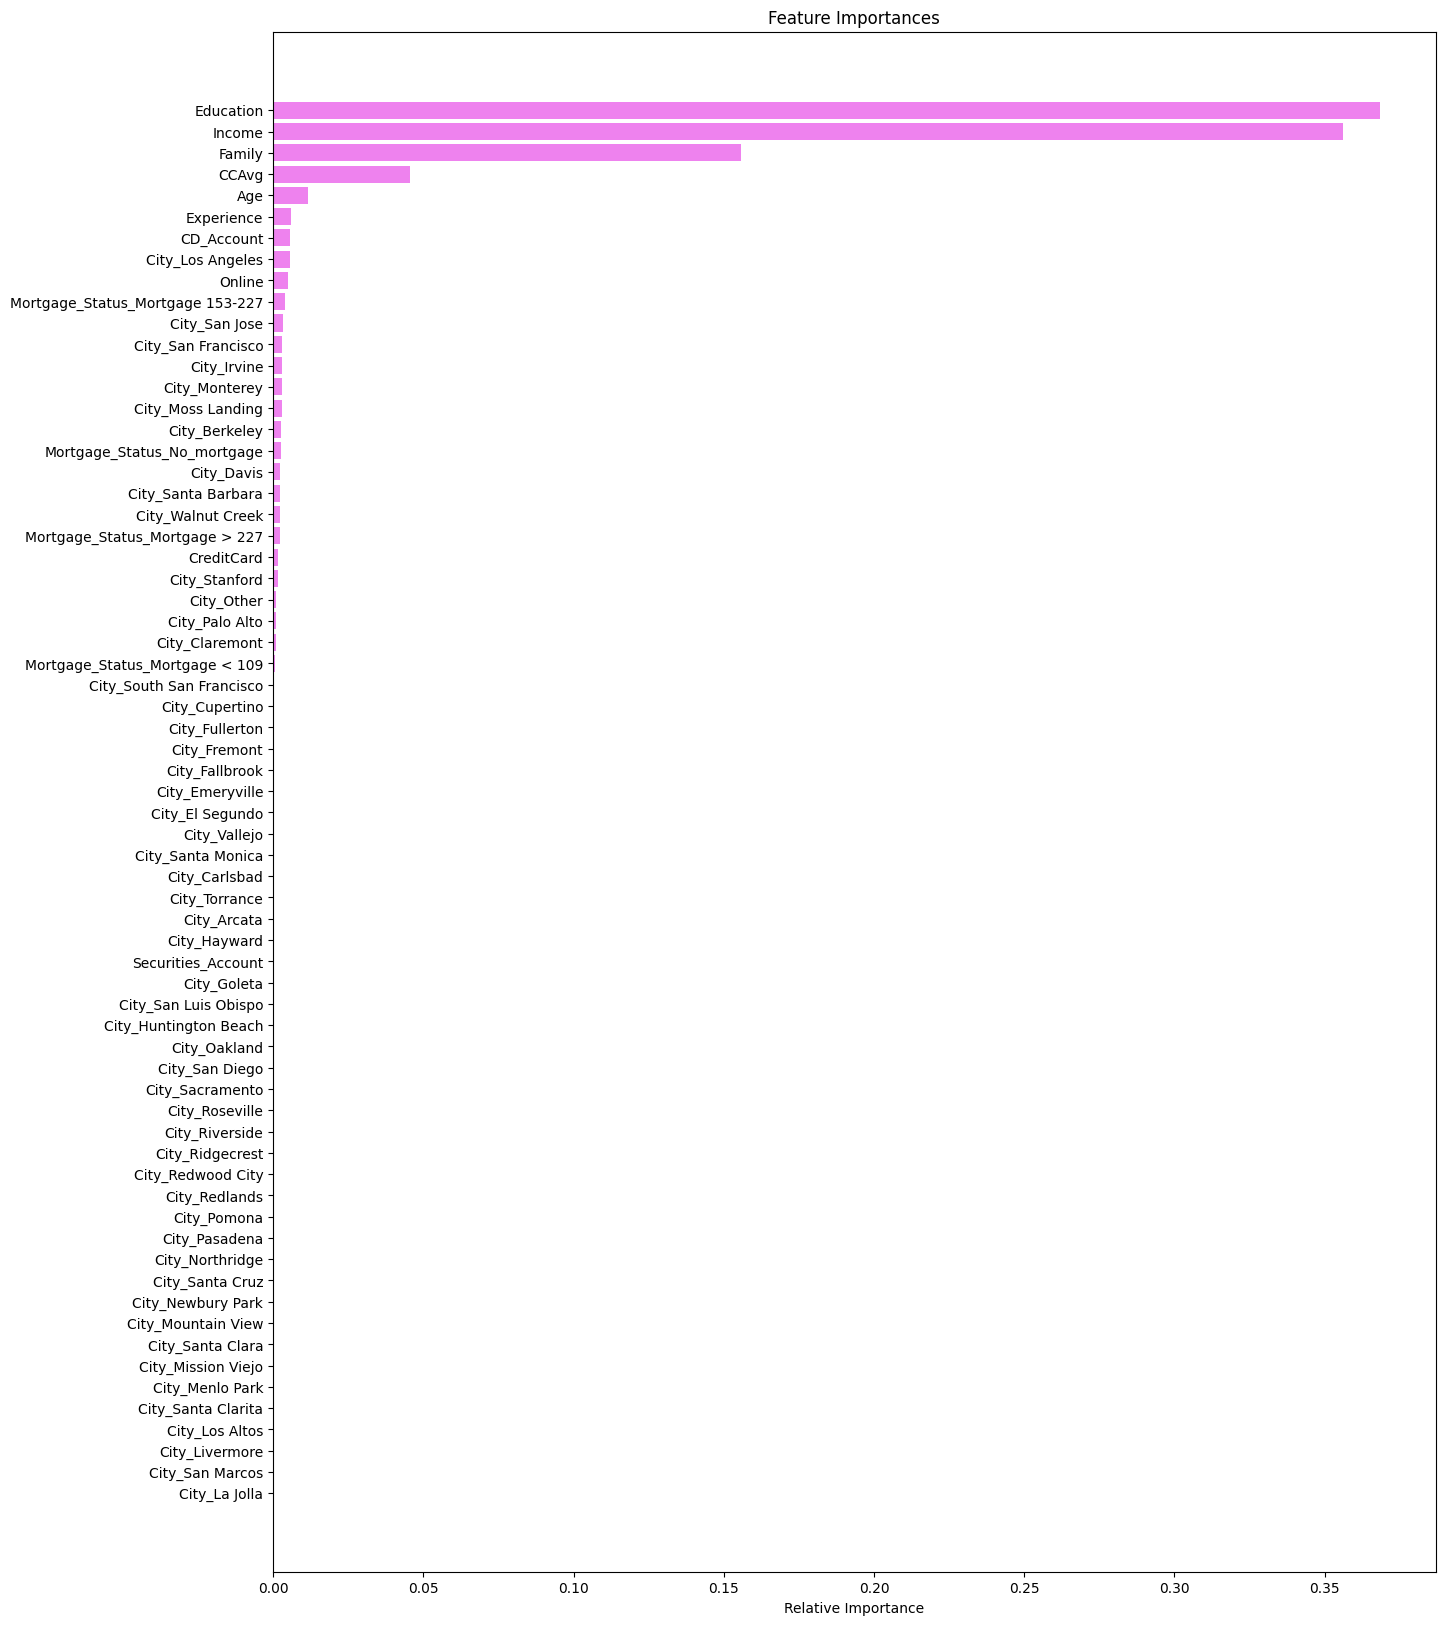

In [121]:
plot_feature_importance(model_default, X_train.columns)

In [122]:
feature_importance_table(model_default, X_train.columns)

                             Feature  Importance
0                          Education    0.368526
1                             Income    0.356287
2                             Family    0.155621
3                              CCAvg    0.045479
4                                Age    0.011727
5                         Experience    0.006036
6                         CD_Account    0.005728
7                   City_Los Angeles    0.005669
8                             Online    0.004860
9   Mortgage_Status_Mortgage 153-227    0.003996
10                     City_San Jose    0.003234
11                City_San Francisco    0.003122
12                       City_Irvine    0.002881
13                     City_Monterey    0.002822
14                 City_Moss Landing    0.002809
15                     City_Berkeley    0.002684
16       Mortgage_Status_No_mortgage    0.002634
17                        City_Davis    0.002372
18                City_Santa Barbara    0.002352
19                 C

**Observation:**
* There is a considerable difference in Recall, Precision and F1 score between training set and test set, indicating that the model is overfitting.
* The default model has depth 12 and it has 57 leaves
* Education, Income and Family are the 3 most important features respectively followed by CCAvg, Age and Experience

## Model Performance Improvement

**Pre-pruning**

In [123]:
#hyper parmeters for pre-prunning
max_depth_values = np.arange(2,12,2)
max_leaf_node_values = np.arange(10,60,10)
min_samples_split_values = np.arange(5, 55, 10)
criteria = ['gini', 'entropy']
splitter = ['best', 'random']

In [124]:
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0
for criterion in criteria:
  for splitter_ in splitter:
    for max_depth in max_depth_values:
      for max_leaf_nodes in max_leaf_node_values:
        for min_samples_split in min_samples_split_values:
          model_pre_prunning = DecisionTreeClassifier(random_state=RS, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split)
          model_pre_prunning.fit(X_train, y_train)

          y_train_pred = model_pre_prunning.predict(X_train)
          y_test_pred = model_pre_prunning.predict(X_test)

          # recall score
          train_score = recall_score(y_train, y_train_pred)
          test_score = recall_score(y_test, y_test_pred)

          score_diff = abs(train_score - test_score) # score difference between train and test data

          if (score_diff < best_score_diff) & (test_score > best_test_score):
            best_estimator = model_pre_prunning
            best_score_diff = score_diff
            best_test_score = test_score

best_pre_prunned_model = best_estimator

print("Best parameters found:")
print("Max depth:", best_pre_prunned_model.max_depth)
print("Max leaf nodes:", best_pre_prunned_model.max_leaf_nodes)
print("Min samples split:", best_pre_prunned_model.min_samples_split)
print("Best test recall score:", best_test_score)
print("Best score difference:", best_score_diff)
print("Best splitter:", best_pre_prunned_model.splitter)
print("Best criterion:", best_pre_prunned_model.criterion)

Best parameters found:
Max depth: 4
Max leaf nodes: 20
Min samples split: 5
Best test recall score: 0.9027777777777778
Best score difference: 0.019841269841269882
Best splitter: best
Best criterion: gini


In [125]:
train_perf_pre_pruned_model = model_performance(best_pre_prunned_model, X_train, y_train)
train_perf_pre_pruned_model.index.values[0] = 'Pre-pruned model train score'
train_perf_pre_pruned_model

Accuracy    Recall  Precision  F1 Score
Pre-pruned model train score     0.988  0.922619    0.95092  0.936556

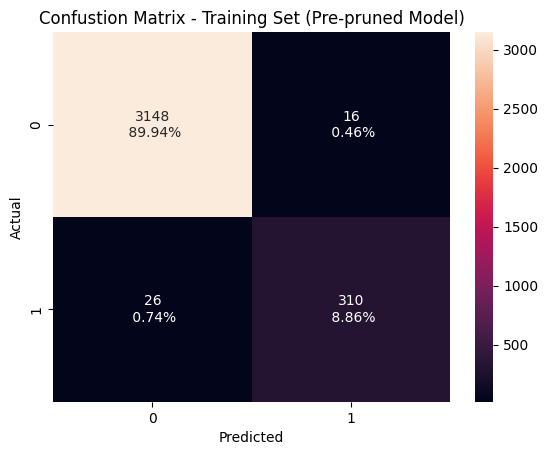

In [126]:
confusion_matrix_plot(best_pre_prunned_model, X_train, y_train, title = 'Confustion Matrix - Training Set (Pre-pruned Model)')

In [127]:
test_perf_pre_pruned_model = model_performance(best_pre_prunned_model, X_test, y_test)
test_perf_pre_pruned_model.index.values[0] = 'Pre-pruned model test score'
test_perf_pre_pruned_model

Accuracy    Recall  Precision  F1 Score
Pre-pruned model test score     0.984  0.902778   0.928571  0.915493

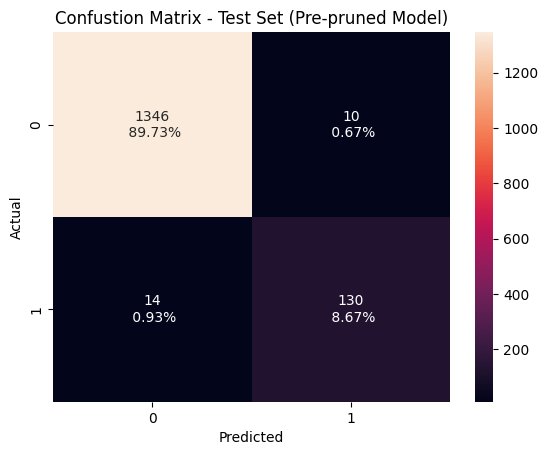

In [128]:
confusion_matrix_plot(best_pre_prunned_model, X_test, y_test,  title = 'Confustion Matrix - Test Set (Pre-pruned Model)')

In [129]:
train_vs_test_pre_pruned_model = pd.concat([train_perf_pre_pruned_model, test_perf_pre_pruned_model], axis=0)
train_vs_test_pre_pruned_model

Accuracy    Recall  Precision  F1 Score
Pre-pruned model train score     0.988  0.922619   0.950920  0.936556
Pre-pruned model test score      0.984  0.902778   0.928571  0.915493

In [130]:
model_comparison = pd.concat([train_vs_test_default, train_vs_test_pre_pruned_model], axis=0)
model_comparison

Accuracy    Recall  Precision  F1 Score
Default model train score     1.000000  1.000000   1.000000  1.000000
Default model test score      0.979333  0.895833   0.889655  0.892734
Pre-pruned model train score  0.988000  0.922619   0.950920  0.936556
Pre-pruned model test score   0.984000  0.902778   0.928571  0.915493

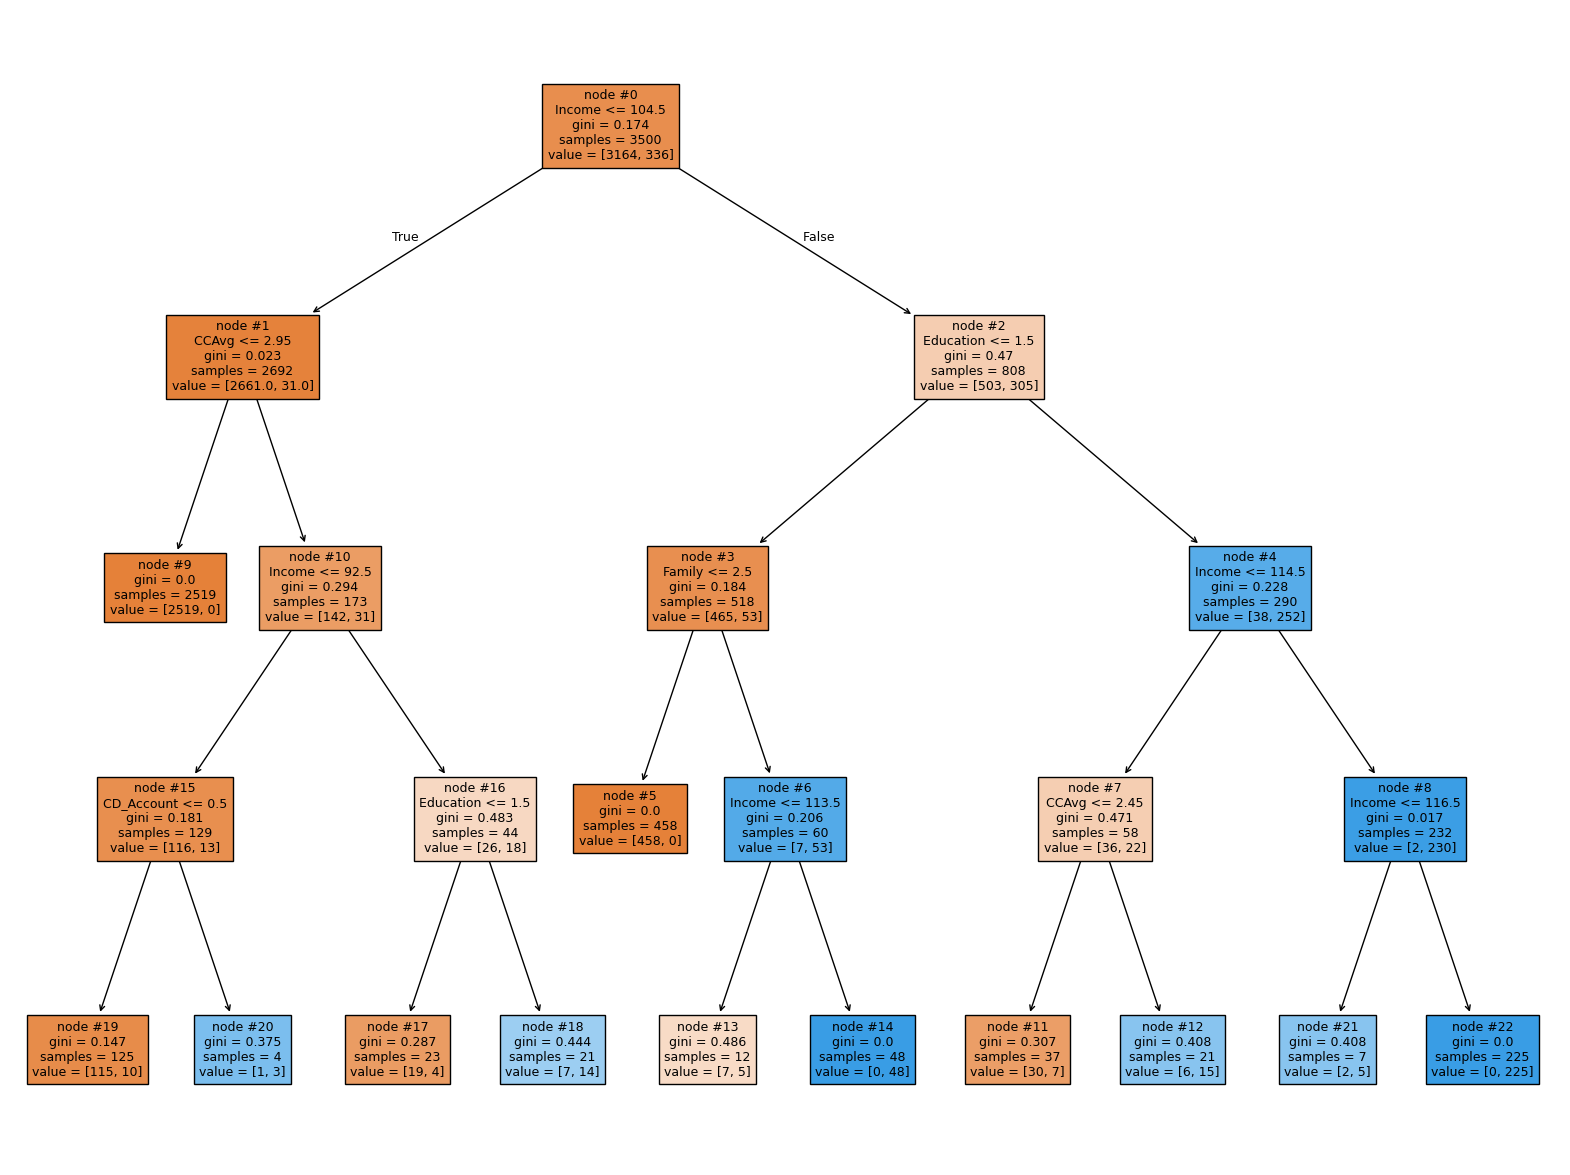

In [131]:
visualize_tree(best_pre_prunned_model, X_train.columns, figsize=(20,15))

In [132]:
print_tree(best_pre_prunned_model, X_train.columns)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [115.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [1.00, 3.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [19.00, 4.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [7.00, 14.00] class: 1
|--- Income >  104.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [458.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [7.00, 5.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [30.00, 7.00] class: 0
|  

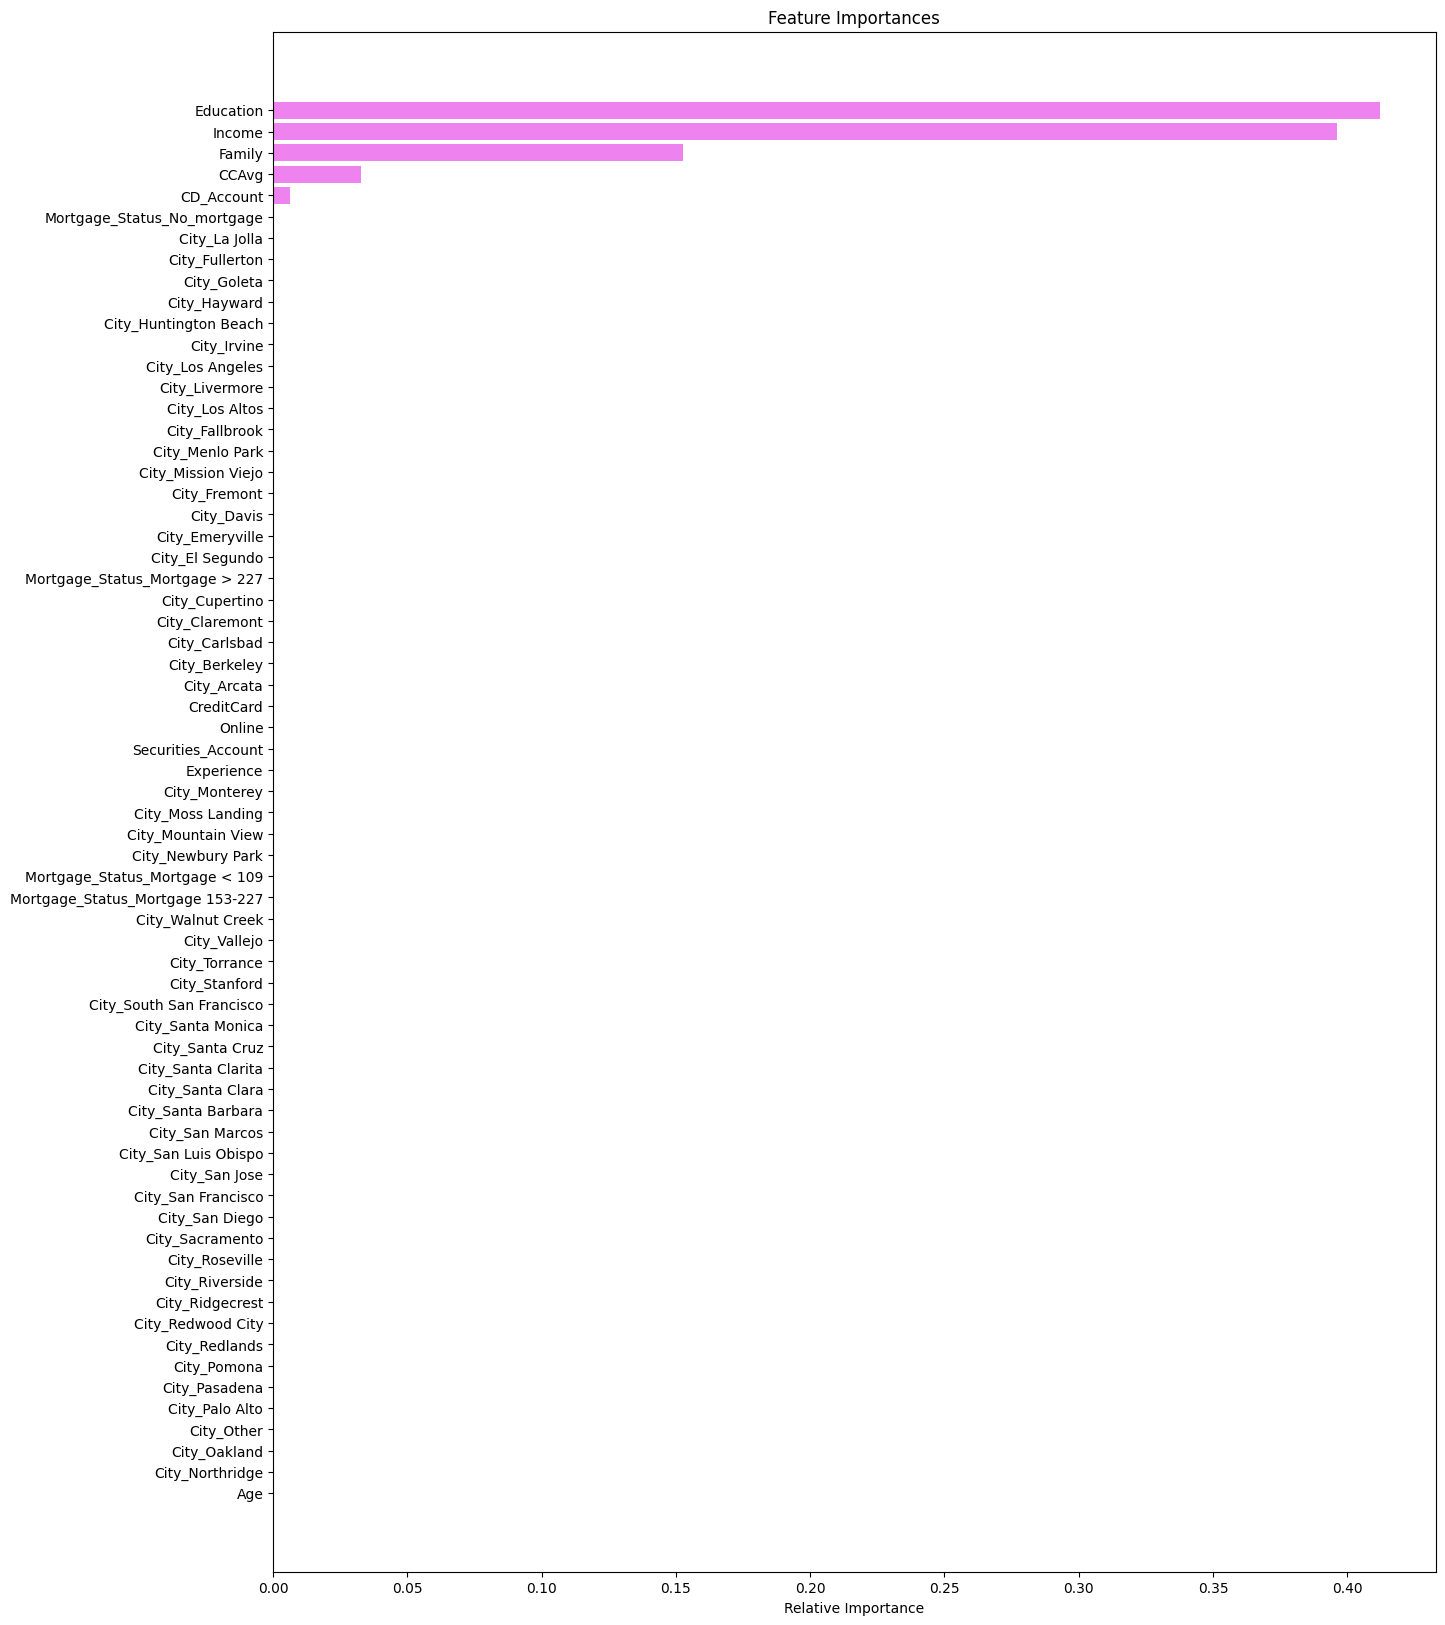

In [133]:
plot_feature_importance(best_pre_prunned_model, X_train.columns)

In [134]:
feature_importance_table(best_pre_prunned_model, X_train.columns)

                             Feature  Importance
0                          Education    0.412268
1                             Income    0.396121
2                             Family    0.152454
3                              CCAvg    0.032748
4                         CD_Account    0.006408
5                                Age    0.000000
6                     City_Riverside    0.000000
7                      City_San Jose    0.000000
8                 City_San Francisco    0.000000
9                     City_San Diego    0.000000
10                   City_Sacramento    0.000000
11                    City_Roseville    0.000000
12                     City_Redlands    0.000000
13                   City_Ridgecrest    0.000000
14                 City_Redwood City    0.000000
15                   City_San Marcos    0.000000
16                       City_Pomona    0.000000
17                     City_Pasadena    0.000000
18                    City_Palo Alto    0.000000
19              City

**Observation (Pre-pruning):**

* The best model found after appying the pre-pruning has the following attributes:
  * Max depth: 4
  * Max leaf nodes: 20
  * Min samples split: 5
  * Best test recall score: 0.9027777777777778
  * Best splitter: best
  * Best criterion: gini
So, the model has been simplified compared to the default model
* It has better recall score in the test set compared to the default model. From the confusion matrix we observe that the false negative prediction in test dataset has been lower in the pre-pruned simplified model than that of the default model.
* We observe in our selected pre-pruned model the difference among respective evaluation metrics of test dataset and train dataset are very small. This implies that this model is not overfitting, rather, it is generalizing well.
* Education, Income, Family, CCAvg, and CD_Account are most important feaures respectively.


**Post pruning**

* We will now post prune decision tree using cost complexity parameter alpha
* Our goal is to find the optimal value for alpha against our agreed evaluation metric recall

In [135]:
clf = DecisionTreeClassifier(random_state=RS)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_df = pd.DataFrame({'alpha': ccp_alphas, 'impurity': impurities})
ccp_df

alpha  impurity
0   0.000000  0.000000
1   0.000188  0.000564
2   0.000245  0.003013
3   0.000250  0.004013
4   0.000277  0.004567
5   0.000343  0.005252
6   0.000345  0.006286
7   0.000397  0.007081
8   0.000412  0.007492
9   0.000429  0.007921
10  0.000429  0.008778
11  0.000457  0.009235
12  0.000500  0.009735
13  0.000532  0.010267
14  0.000567  0.011400
15  0.000576  0.014854
16  0.000603  0.015457
17  0.000627  0.016712
18  0.000854  0.017566
19  0.000994  0.018560
20  0.001167  0.019727
21  0.001523  0.021250
22  0.001782  0.023032
23  0.001867  0.024899
24  0.002111  0.027009
25  0.002970  0.029980
26  0.009933  0.039913
27  0.023654  0.063566
28  0.055001  0.173568

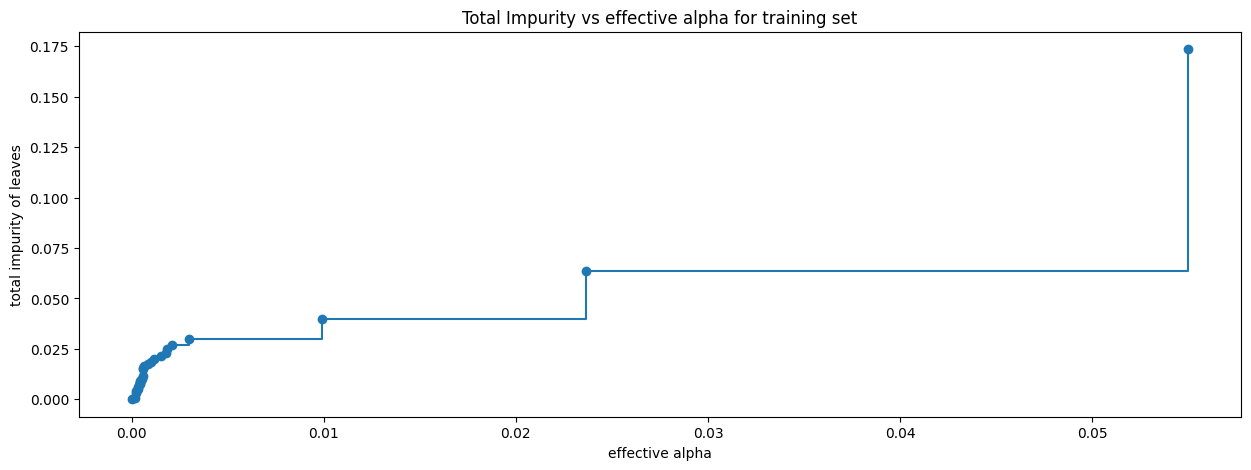

In [136]:
# Plot impurity vs effective alpha for the default tree
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_df['alpha'], ccp_df['impurity'], marker='o', drawstyle="steps-post")
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

* At the root node alpha value is the highest as the impurity is also the highest in that node
* We will train the model for each alpha value. Our goal is to find a simpler model with optimum alpha and recall.

In [137]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=RS, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [138]:
# Number of nodes in the last tree
nodes = clfs[-1].tree_.node_count
print(f'The number of nodes in the last tree is {nodes} with ccp_alpha: {ccp_alphas[-1]} and impurity: {clfs[-1].tree_.impurity}')

The number of nodes in the last tree is 1 with ccp_alpha: 0.05500087826368064 and impurity: [0.173568]


* In line with the previous observation, the last tree has only one node with the highest impurity and ccp_alpha
* We can ignore the last tree for our model comparison.
* We will plot alpha vs node count and alpha vs depth below

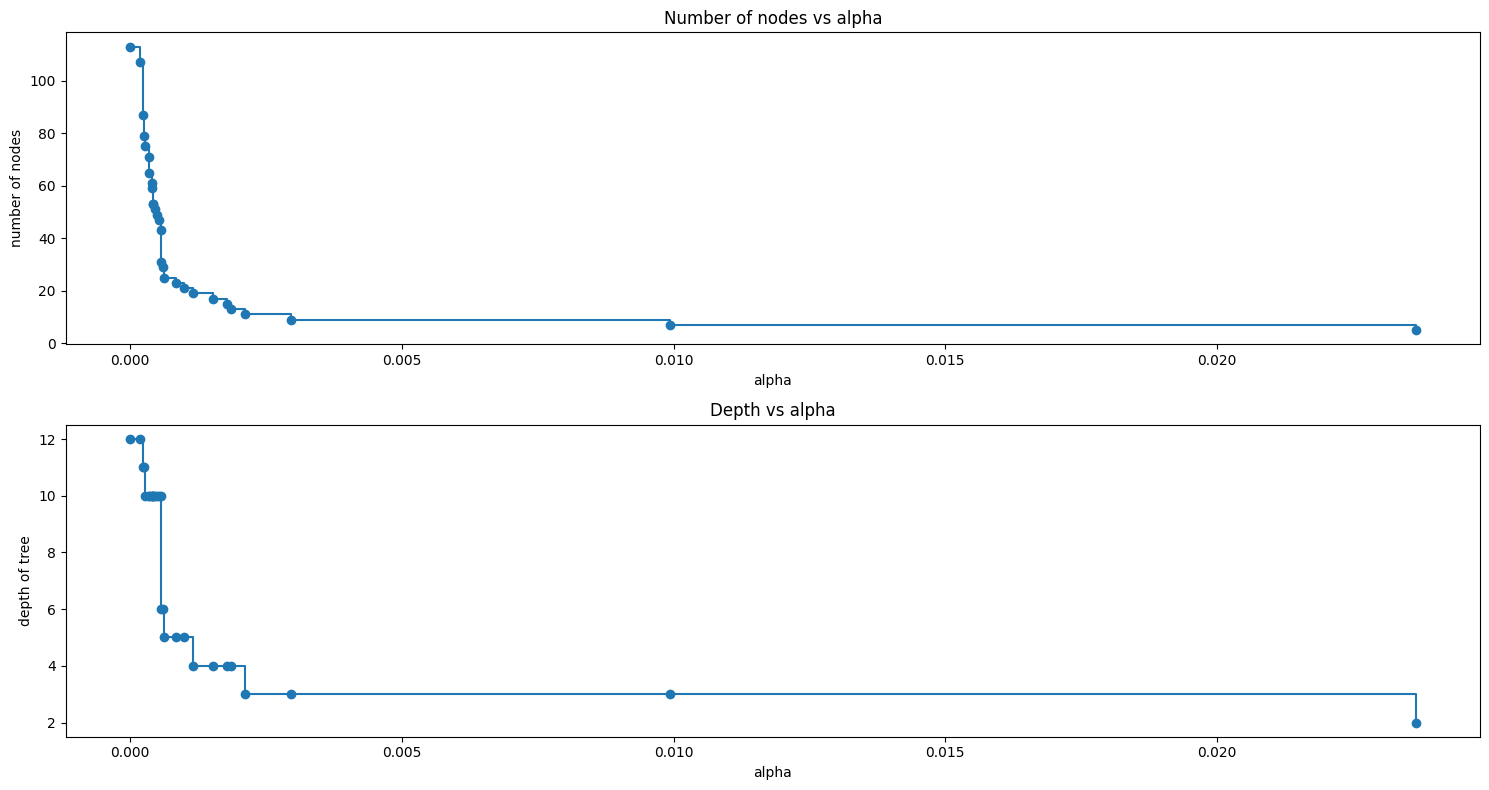

In [139]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
plt.xlabel('alpha')
plt.ylabel('number of nodes')
plt.title('Number of nodes vs alpha')
plt.subplot(2, 1, 2)
plt.plot(ccp_alphas, tree_depths, marker='o', drawstyle="steps-post")
plt.xlabel('alpha')
plt.ylabel('depth of tree')
plt.title('Depth vs alpha')
plt.tight_layout()
plt.show()

* We observe that the alpha value increases, as the number of nodes and depth of the tree decreases
* Let's plot the recall score for each of these trees for the training and the test sets

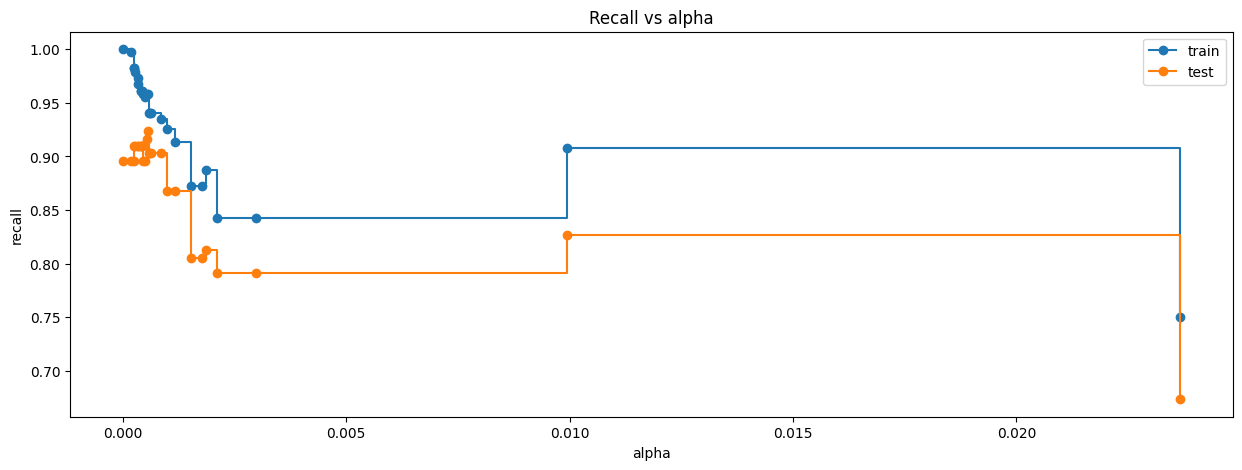

In [140]:
recall_train = []
recall_test = []

for clf in clfs:
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  recall_train.append(recall_score(y_train, y_train_pred))
  recall_test.append(recall_score(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label='test', drawstyle="steps-post")
ax.set_xlabel('alpha')
ax.set_ylabel('recall')
ax.set_title('Recall vs alpha')
ax.legend()
plt.show()

* The best model is where get the highest recall score for our test dataset


In [141]:
best_post_prunned_model = clfs[np.argmax(recall_test)]
best_post_prunned_model

DecisionTreeClassifier(ccp_alpha=0.0005665024630541863, random_state=1)

**Lets compare performance of the best post pruned model between training set and test set**


In [142]:
# training set performance
train_perf_post_pruned_model = model_performance(best_post_prunned_model, X_train, y_train)
train_perf_post_pruned_model.index.values[0] = 'Post-pruned model train score'
train_perf_post_pruned_model

Accuracy    Recall  Precision  F1 Score
Post-pruned model train score  0.992571  0.958333   0.964072  0.961194

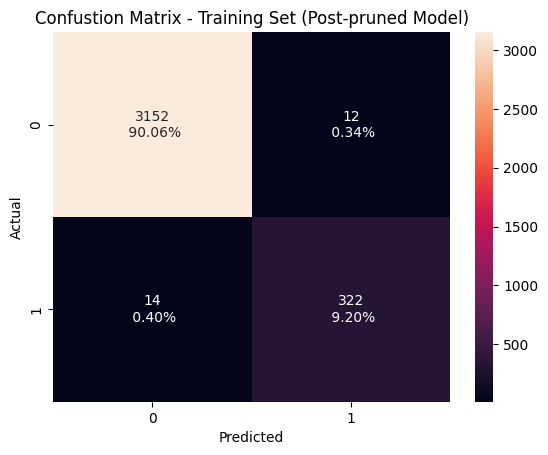

In [143]:
confusion_matrix_plot(best_post_prunned_model, X_train, y_train, title = 'Confustion Matrix - Training Set (Post-pruned Model)')

In [144]:
# test set performance
test_perf_post_pruned_model = model_performance(best_post_prunned_model, X_test, y_test)
test_perf_post_pruned_model.index.values[0] = 'Post-pruned model test score'
test_perf_post_pruned_model

Accuracy    Recall  Precision  F1 Score
Post-pruned model test score     0.986  0.923611    0.93007  0.926829

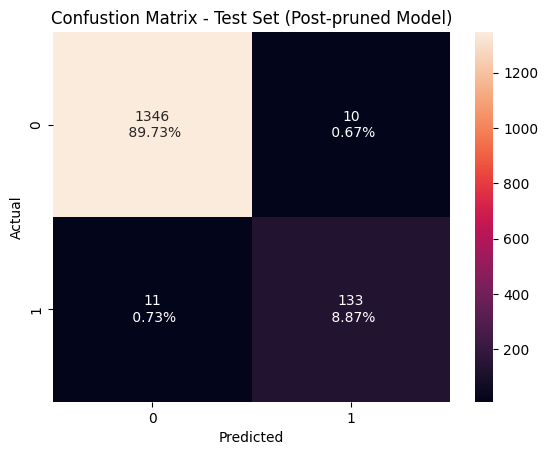

In [145]:
confusion_matrix_plot(best_post_prunned_model, X_test, y_test,  title = 'Confustion Matrix - Test Set (Post-pruned Model)')

In [146]:
train_vs_test_post_pruned_model = pd.concat([train_perf_post_pruned_model, test_perf_post_pruned_model], axis=0)
train_vs_test_post_pruned_model

Accuracy    Recall  Precision  F1 Score
Post-pruned model train score  0.992571  0.958333   0.964072  0.961194
Post-pruned model test score   0.986000  0.923611   0.930070  0.926829

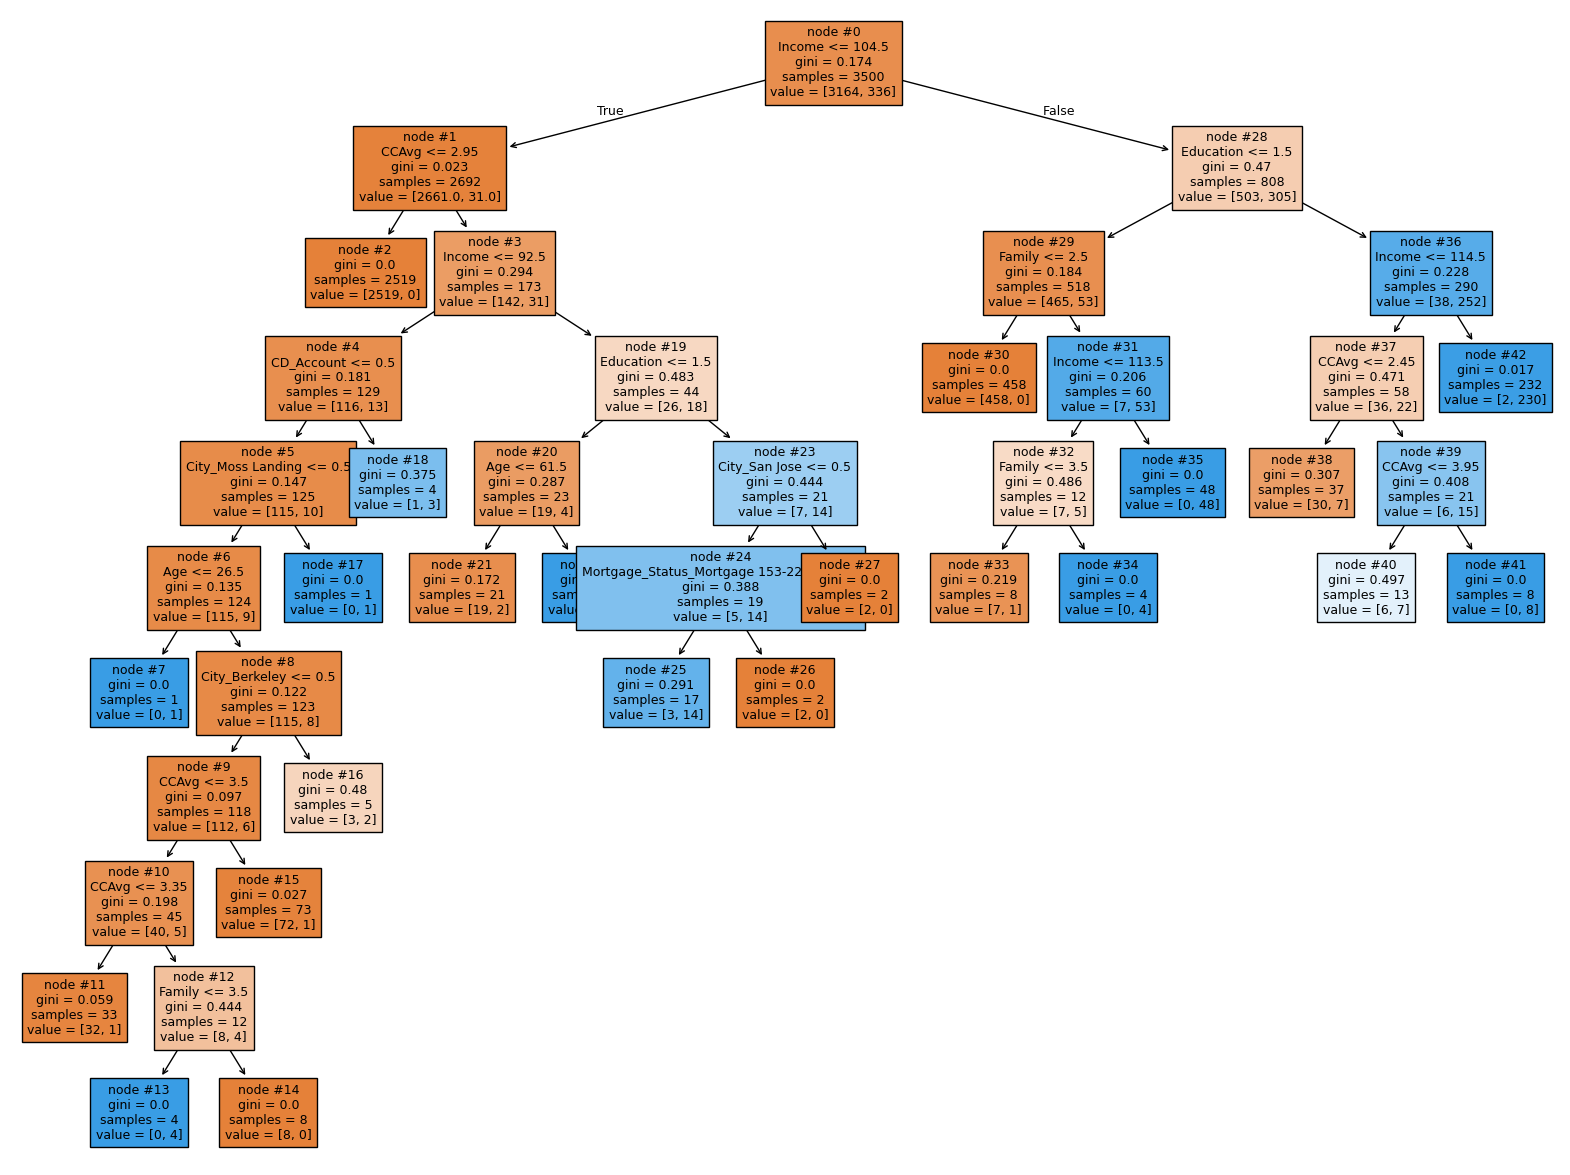

In [147]:
# visualize the post pruned tree
visualize_tree(best_post_prunned_model, X_train.columns, figsize=(20,15))

In [148]:
print_tree(best_post_prunned_model, X_train.columns)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- City_Moss Landing <= 0.50
|   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |--- City_Berkeley <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |   |   |--- weights: [32.00, 1.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [72.00,

In [149]:
best_post_prunned_model.get_depth(), best_post_prunned_model.get_n_leaves() # tree depth and no of leaves

(10, 22)

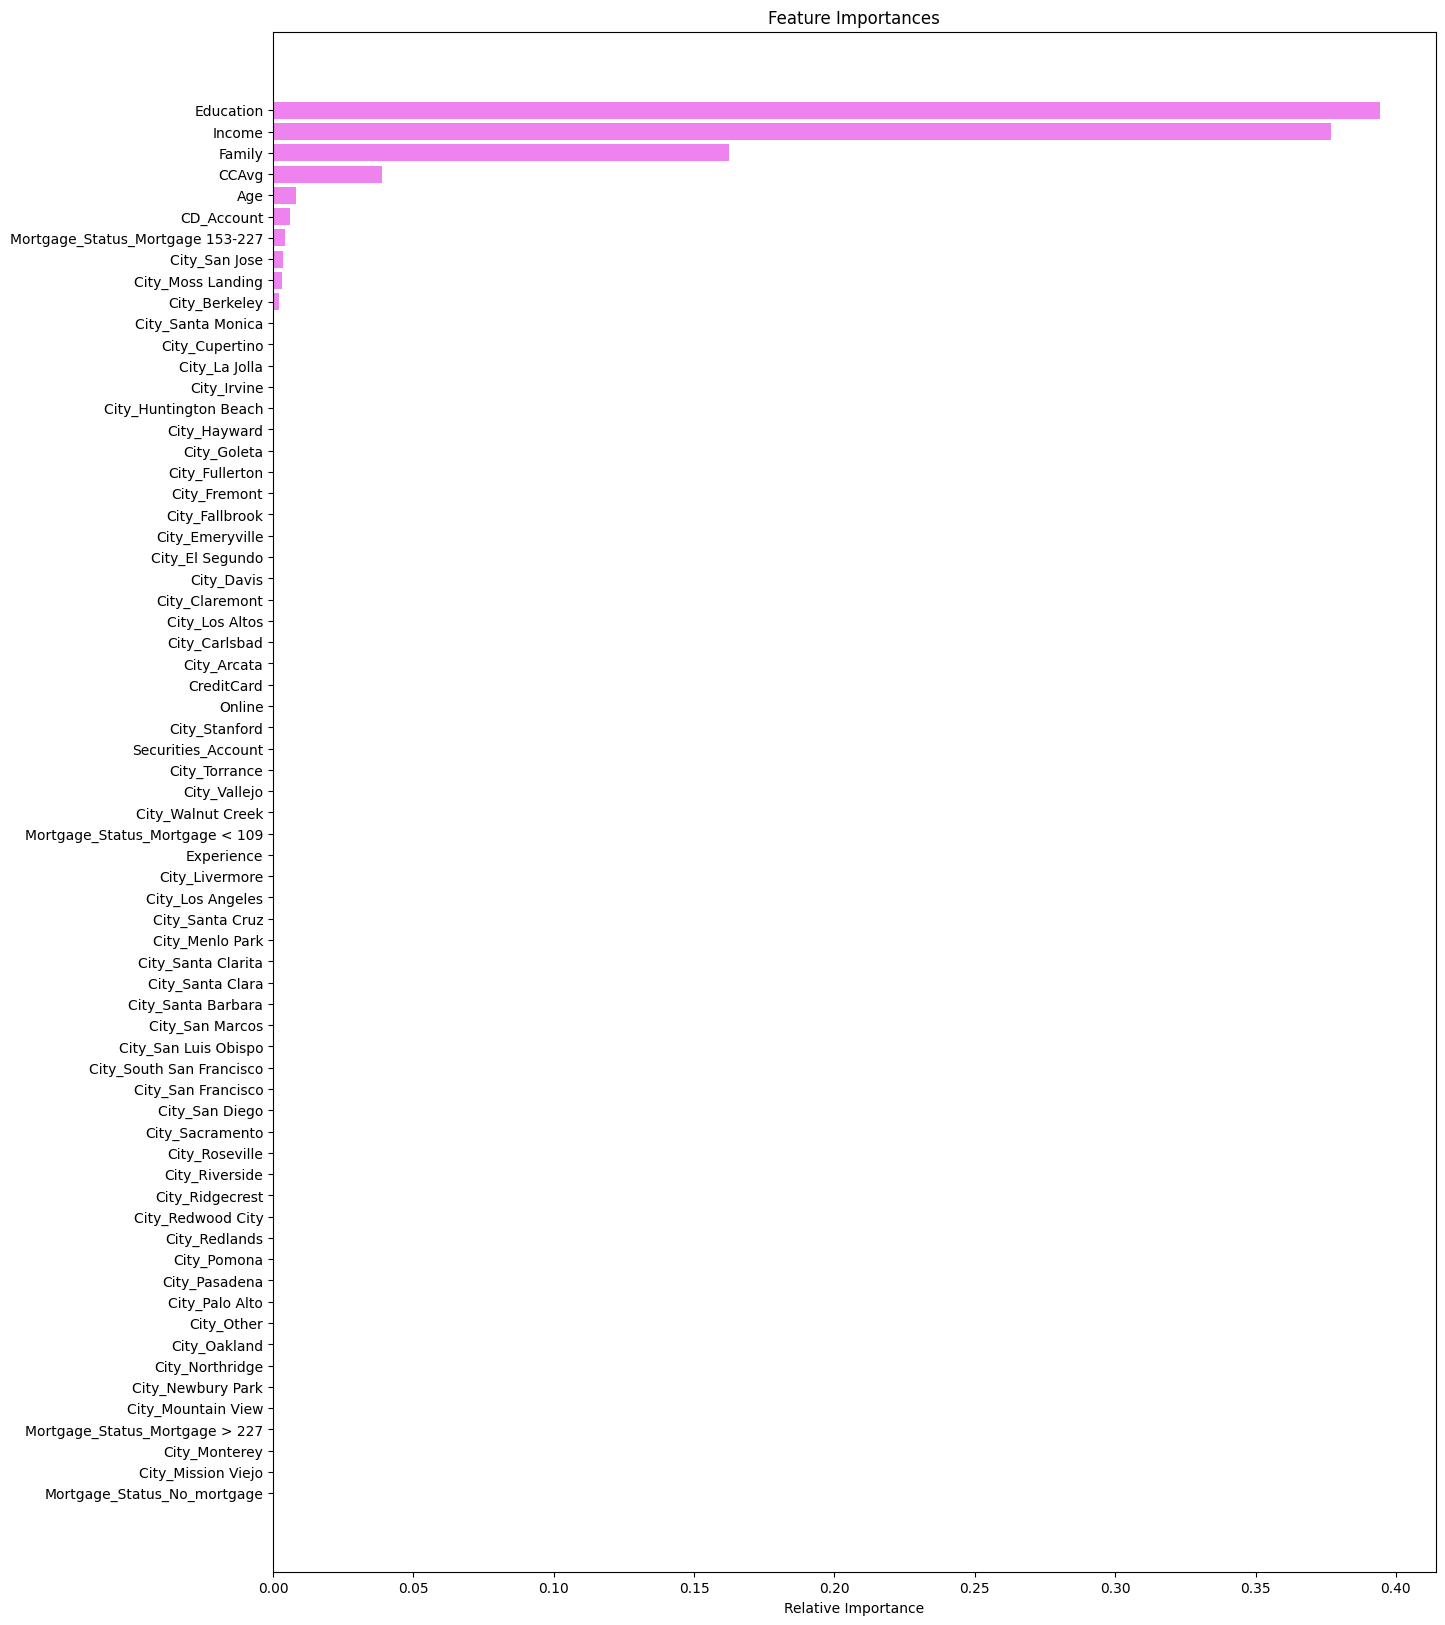

In [150]:
plot_feature_importance(best_post_prunned_model, X_train.columns)

In [151]:
feature_importance_table(best_post_prunned_model, X_train.columns)

                             Feature  Importance
0                          Education    0.394433
1                             Income    0.377032
2                             Family    0.162450
3                              CCAvg    0.038827
4                                Age    0.008323
5                         CD_Account    0.006131
6   Mortgage_Status_Mortgage 153-227    0.004276
7                      City_San Jose    0.003462
8                  City_Moss Landing    0.003007
9                      City_Berkeley    0.002061
10                       City_Pomona    0.000000
11                     City_Pasadena    0.000000
12              City_San Luis Obispo    0.000000
13                     City_Redlands    0.000000
14                 City_Redwood City    0.000000
15                   City_Ridgecrest    0.000000
16                    City_Riverside    0.000000
17                    City_Roseville    0.000000
18                   City_Sacramento    0.000000
19                  

**Observation (Post-prunning):**
* The post pruned decision tree has depth 10 with 22 leaves.
* The evaluation score difference between the training dataset and the test dataset indicates the model is generalizing well.
* Education, Income,Family, CCAvg, Age,CD_Account, Mortgage_Status_Mortgage 153-227 are the most imp

## Model Performance Comparison and Final Model Selection

In [152]:
model_comparison = pd.concat([train_vs_test_default, train_vs_test_pre_pruned_model, train_vs_test_post_pruned_model], axis=0)
model_comparison

Accuracy    Recall  Precision  F1 Score
Default model train score      1.000000  1.000000   1.000000  1.000000
Default model test score       0.979333  0.895833   0.889655  0.892734
Pre-pruned model train score   0.988000  0.922619   0.950920  0.936556
Pre-pruned model test score    0.984000  0.902778   0.928571  0.915493
Post-pruned model train score  0.992571  0.958333   0.964072  0.961194
Post-pruned model test score   0.986000  0.923611   0.930070  0.926829

**Observations**

* Decision tree with post-pruning has the highest recall score in the test data set.
* Both pre-pruned and post-pruned decision tree generalizes well. Pre-pruned model has recall score difference 0.019841 between train and test dataset. The post pruned model has recall score difference 0.034722 between train and test dataset. Though pre-pruned model generalizes slightly better than the post pruned model, the difference is not significant
* Pre-pruned decision tree model has max depth 4 and 20 leaves. The decision tree after post pruning has depth 10 with 22 leaves. Though the model with pre-pruning is the simplest model, post-pruned model is still a simpler model compared to the default model. It will likely to increase conversion as it has the best recall score.
* Though in the Chi-squared test we observed that the Mortgage_Status feature has influence on Personal_Loan, the pre-pruned model implies it has 0 feature importance. On the contrary, the post-pruned model stays in line with the chi squared test. It highlights the importance of customer with mortage debt between 153k USD and 227k USD.
* Based on the above analysis, the finally selected model is the decision tree with the post-pruned model.




## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* We observed that Education, Income, Family, CCAVg, CDAccount are the most important variables. This observation holds true both in our exploratory data analysis and different decision tree models we built. As per our finally selected model Age and Mortgage debt between 153k USD and 227k USD also influence the acceptance of the personal loan offer.
* We observed Education plays an important role and customers with graduate lavel and advanced/professional level are more likely to accept the loan offer.
* 75% of customers who accepted loan offer in the previous marketing campaign have income 122k USD or more. Future campaigns should target more customer with this demogrphaic.
* Customers with family size 3 are more likely to accept loan offer, followed by family size 4.
* Customers with average monthly credit card spending more than 2.6k USD are more likely to accept loan offer
* Customers who have Certificate of Deposit Account with the bank are more likely to accept loan offer 75% of the Future campaign should target age demographic 35 or over.
* Customers with mortgage debt between 153k USD and 227k USD  are more likely to accept the loan offer.
* We observed customer's residence location has some influence as our chosen model suggests customers form San Jose, Moss Landing, Berkeley are more likely to accept loan offer. All Life bank should further investigates the demographic, customer behaviour and social economic condition of these cities which could provide insightful information and help targeting customers in other cities.
* In summary the best customer profile for furture loan campaign is, a customer with garduate or advanced education lavel who has annual income over $120k with family size more than 2, who has monthly credit card spending 2.6k USD or more and also holds certificate of deposit account with the bank, whose age is between 35 and 55 and has a morgage debt between 153k USD and 227k USD.
* If possible, offer promotions to attract potential loan customers to take a loan.



___